# 📈 Commodity-FX Correlation and Predictive Modeling

## 📄 Project Overview

This repository contains a Python script designed to **analyze the historical correlation and model the predictive relationship** between key commodity prices (Oil, Gold, Copper) and their corresponding currency exchange rates (FX).

The core methodology involves applying **Simple Linear Regression** to the logarithmic returns of the time series data. Model robustness is rigorously assessed using **TimeSeriesSplit Cross-Validation**, an appropriate technique for handling the temporal dependency inherent in financial data.

## 💾 Repository Structure

* `analysis_script.py` (or the name of your file): The main Python script containing data loading, cleaning, visualization, and machine learning functions.
* `COMMODITIES_FX.xlsx`: The required input Excel file containing the historical price data. **(Must be placed in the path specified in the script)**

## ⚙️ Requirements

To run this analysis script, you need the following Python libraries. You can install them using pip:

```bash
pip install pandas numpy matplotlib scikit-learn openpyxl

Available columns in the final DataFrame 'df':
Index(['petroleo', 'RUB/USD', 'NOK/USD', 'CAD/USD', 'oro', 'EUR/USD', 'cobre',
       'CLP/USD', 'COP/USD'],
      dtype='object')


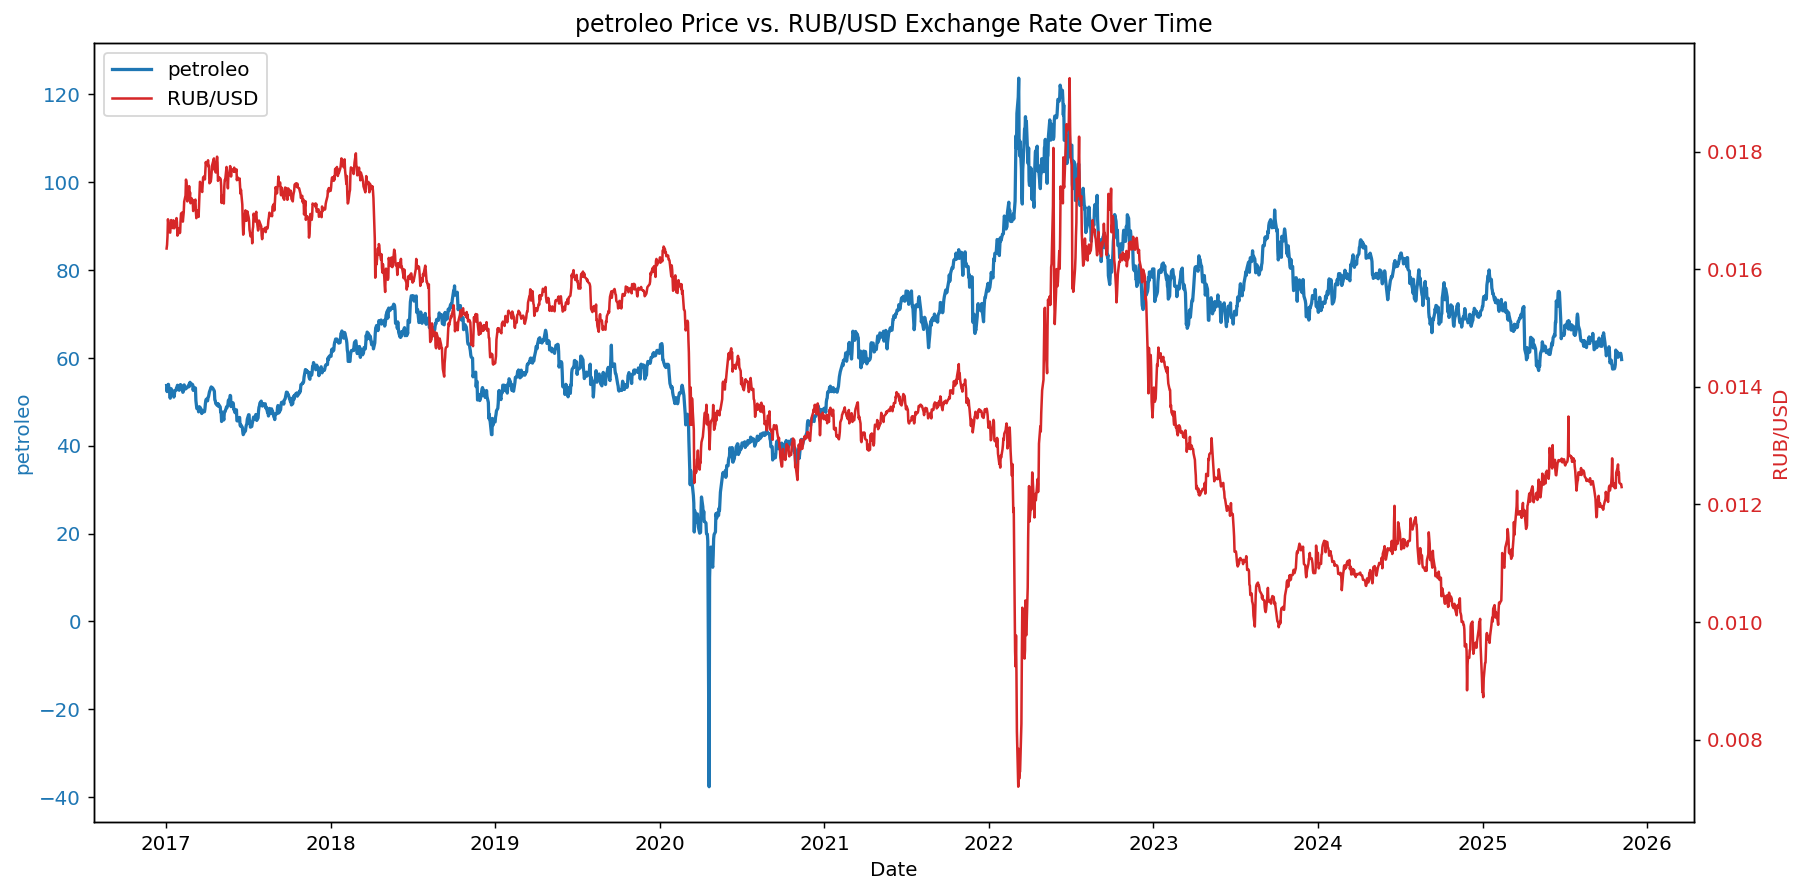

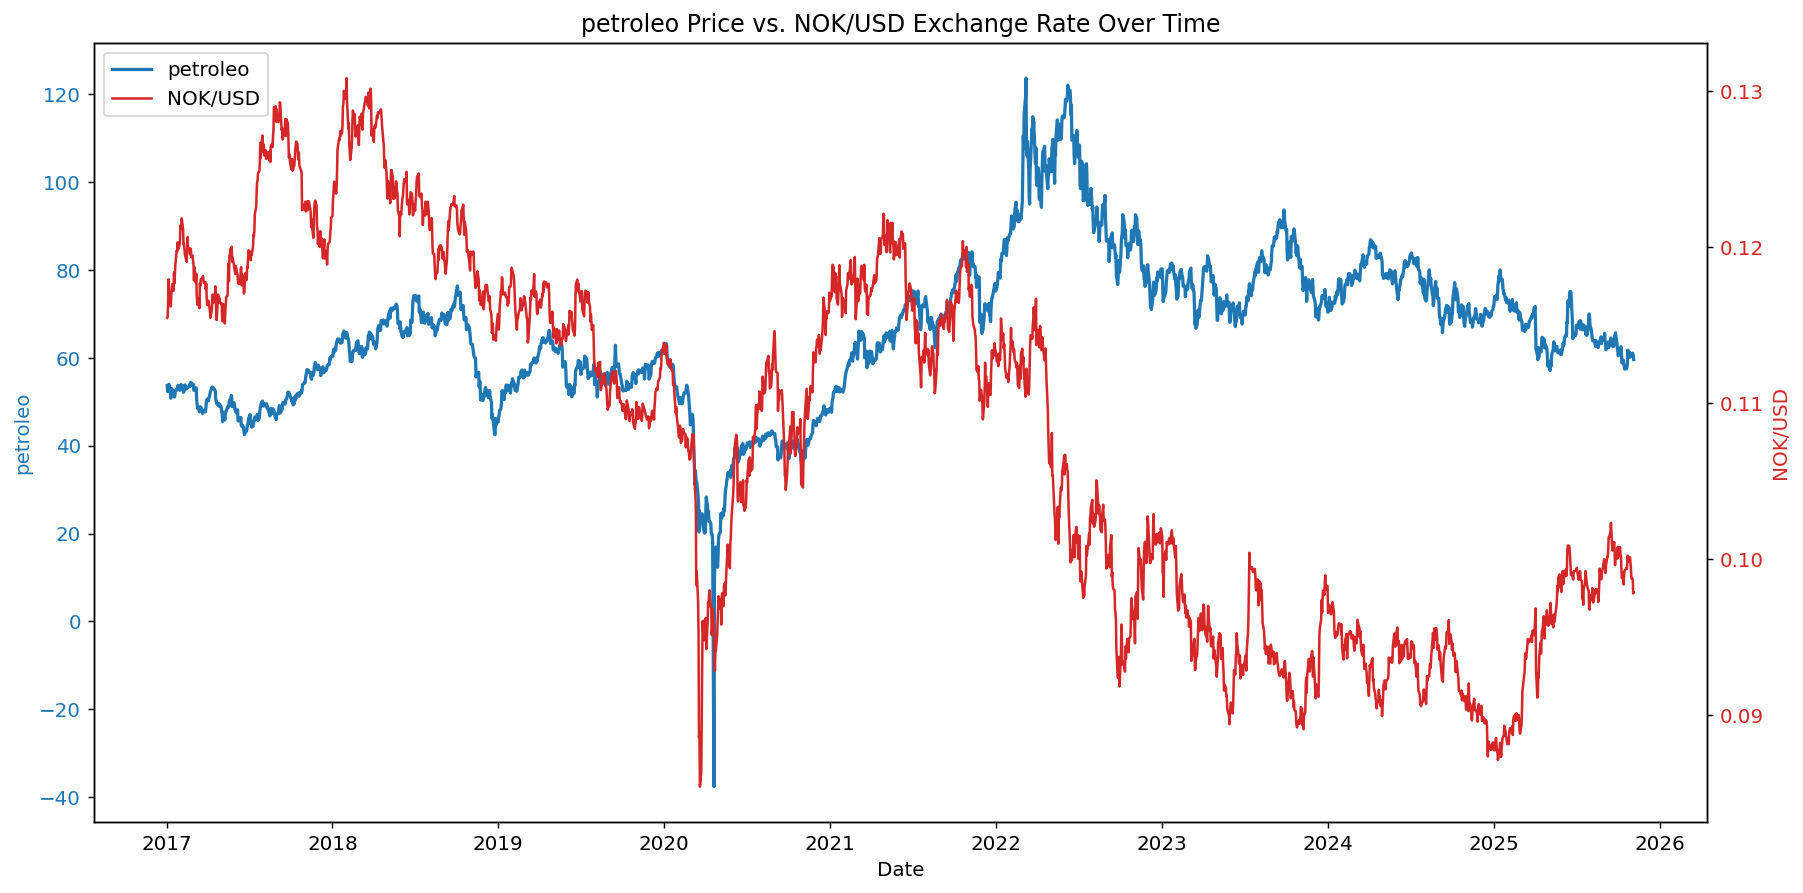

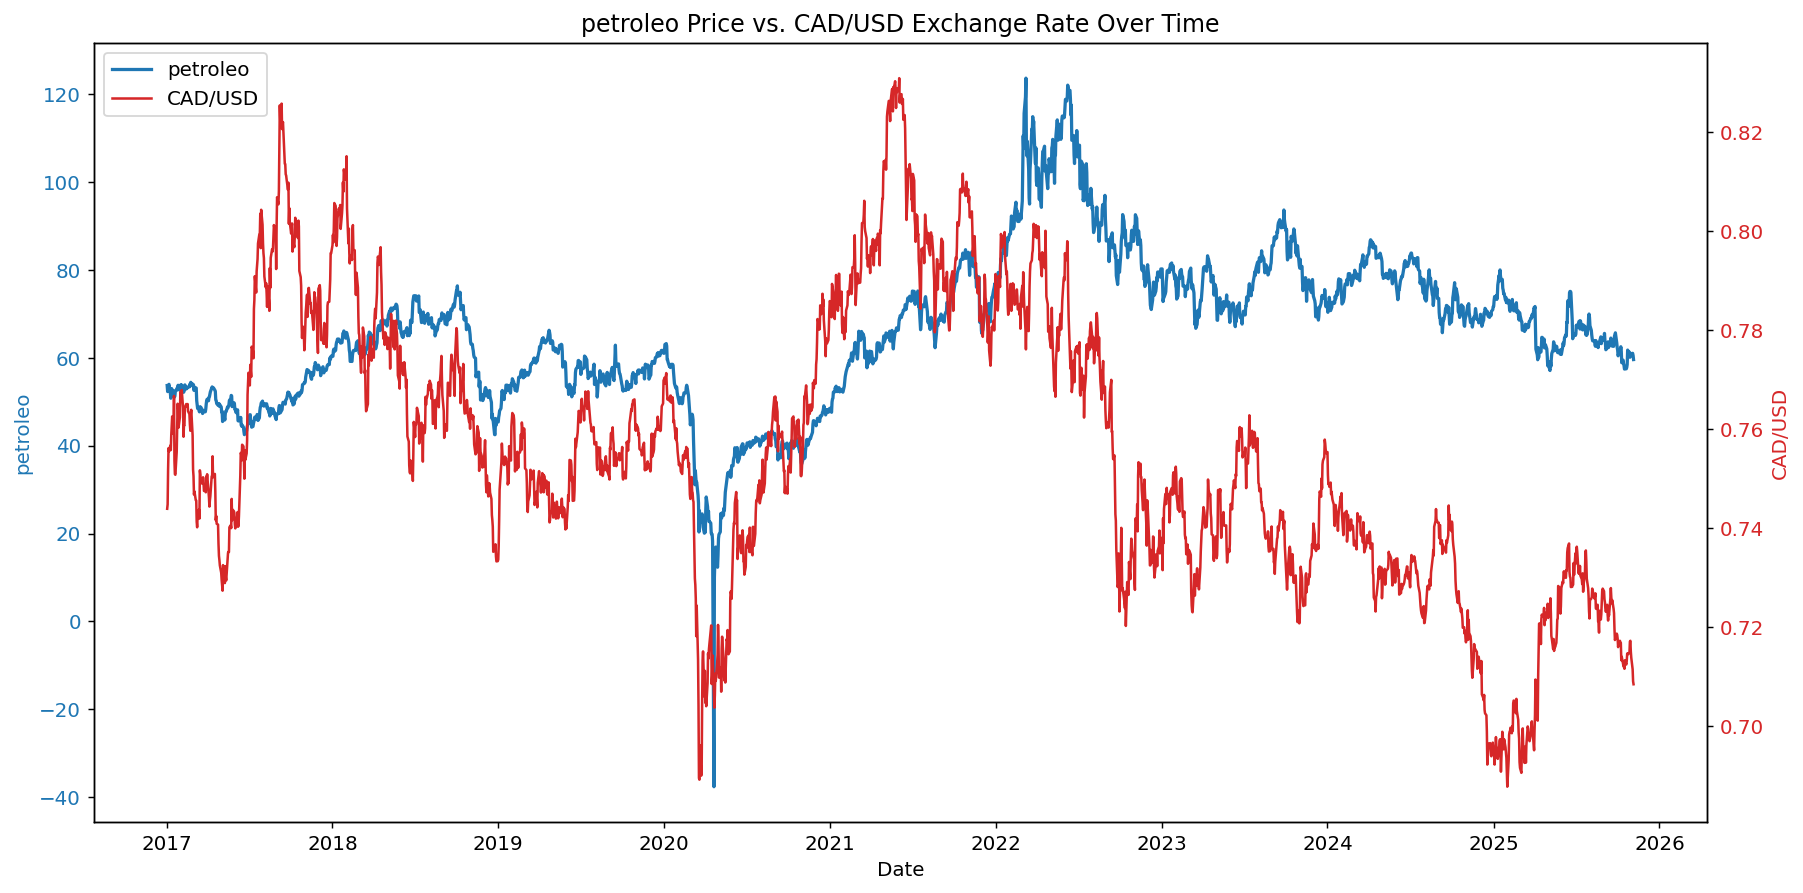

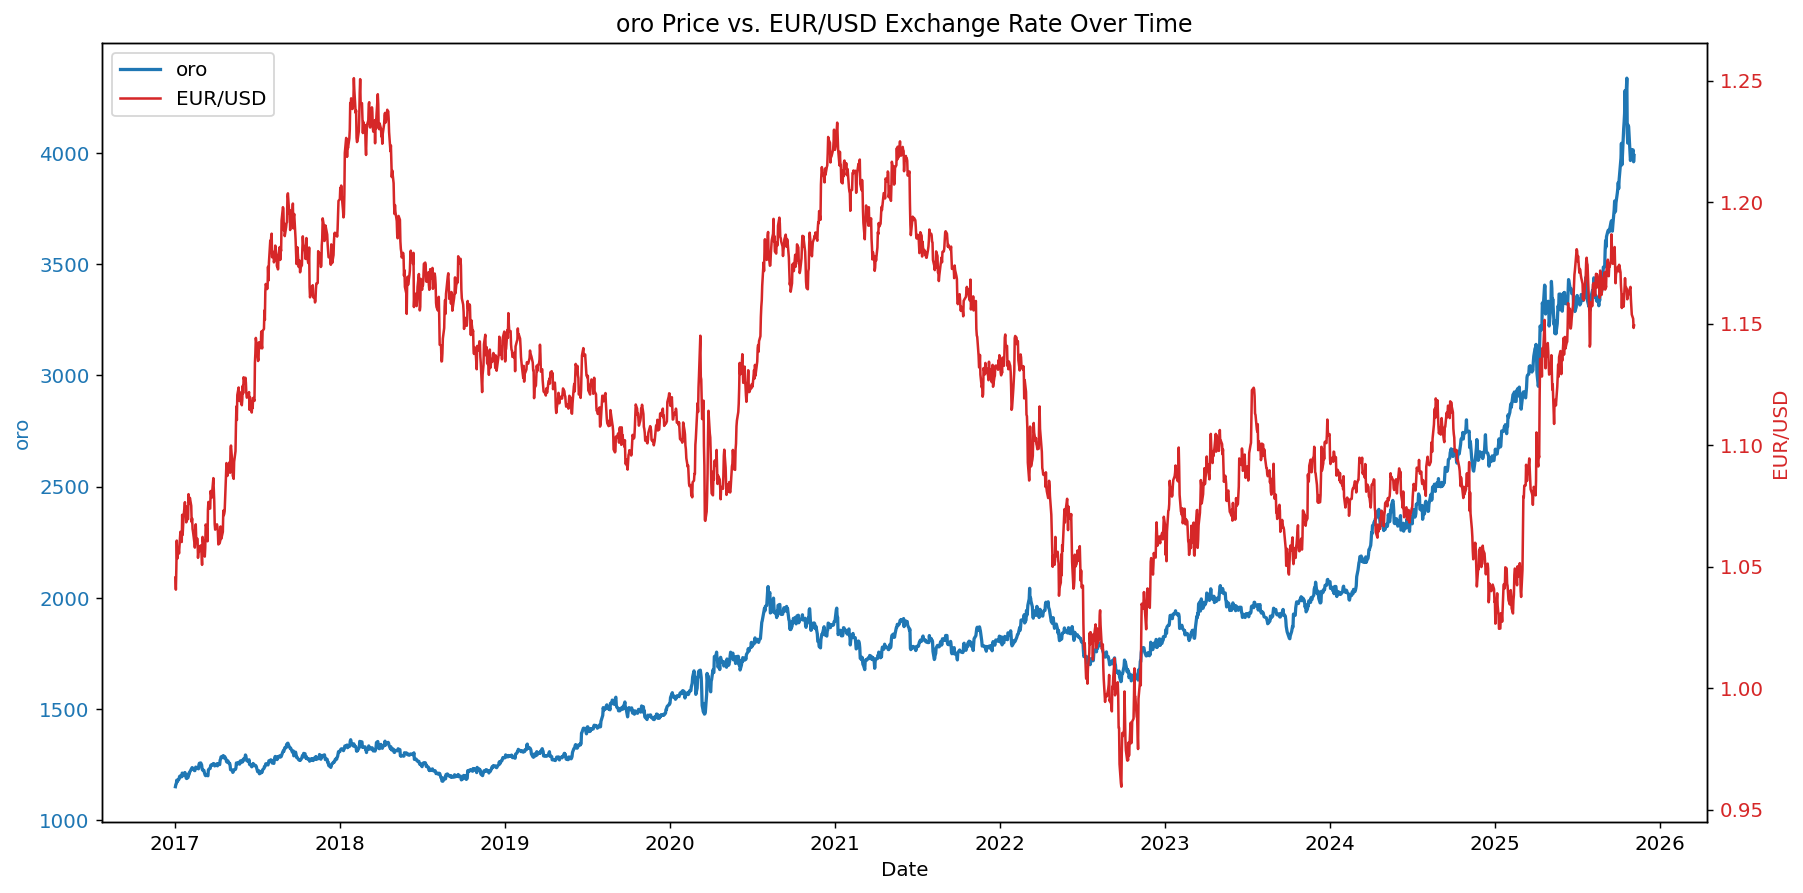

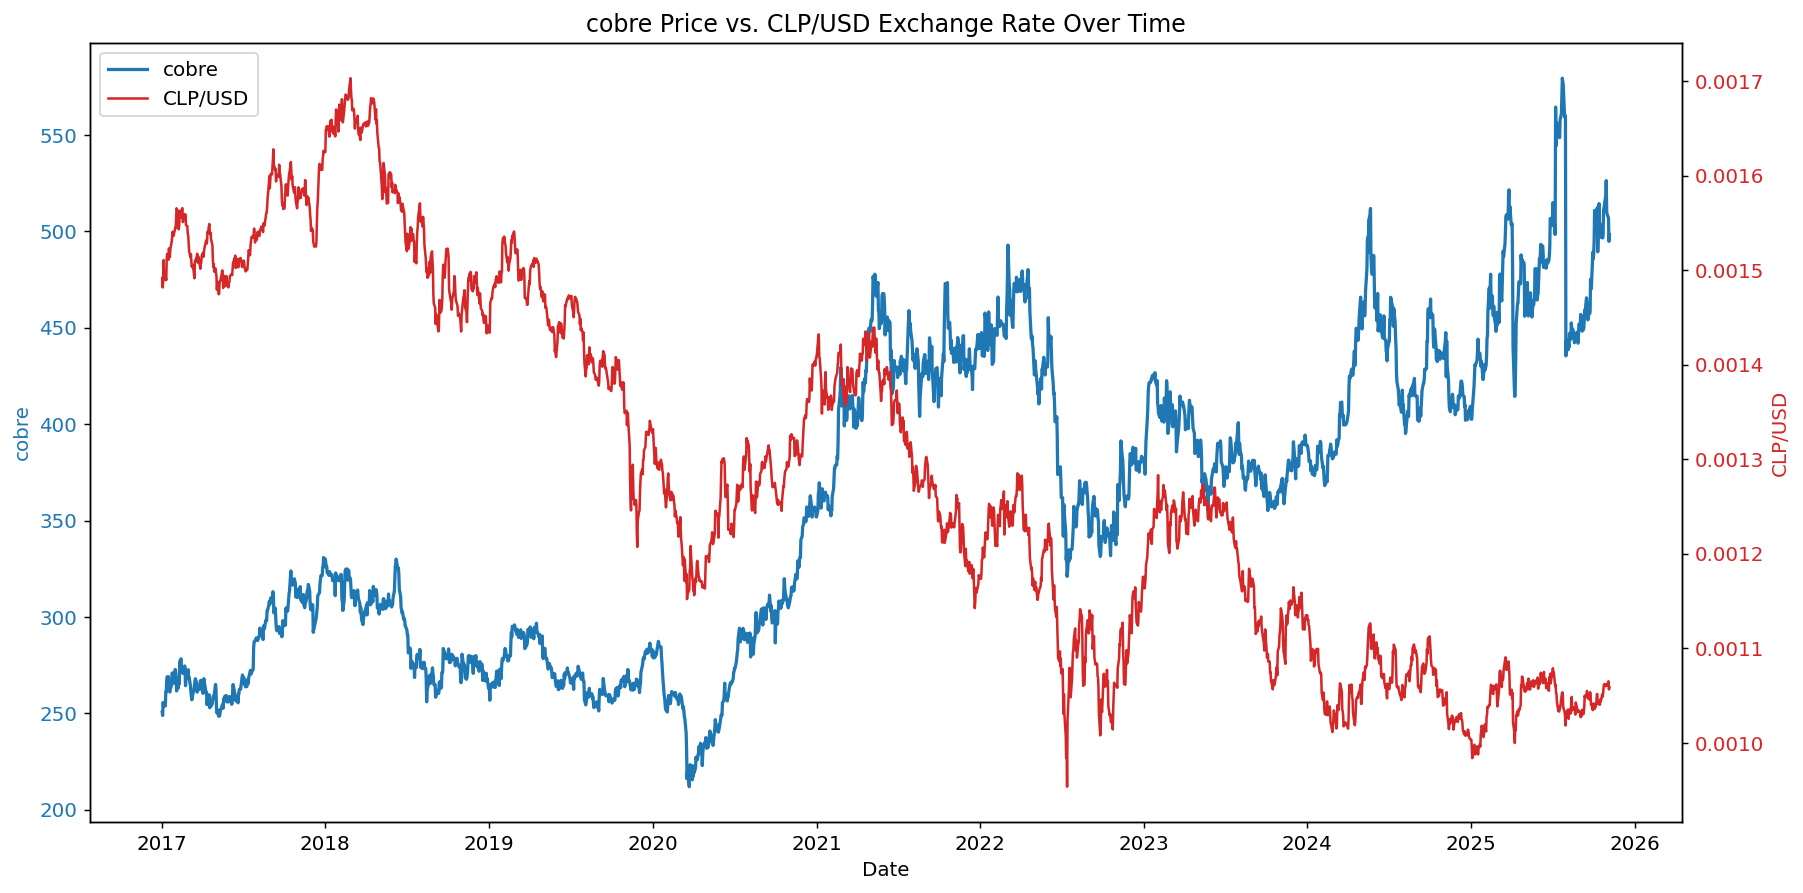

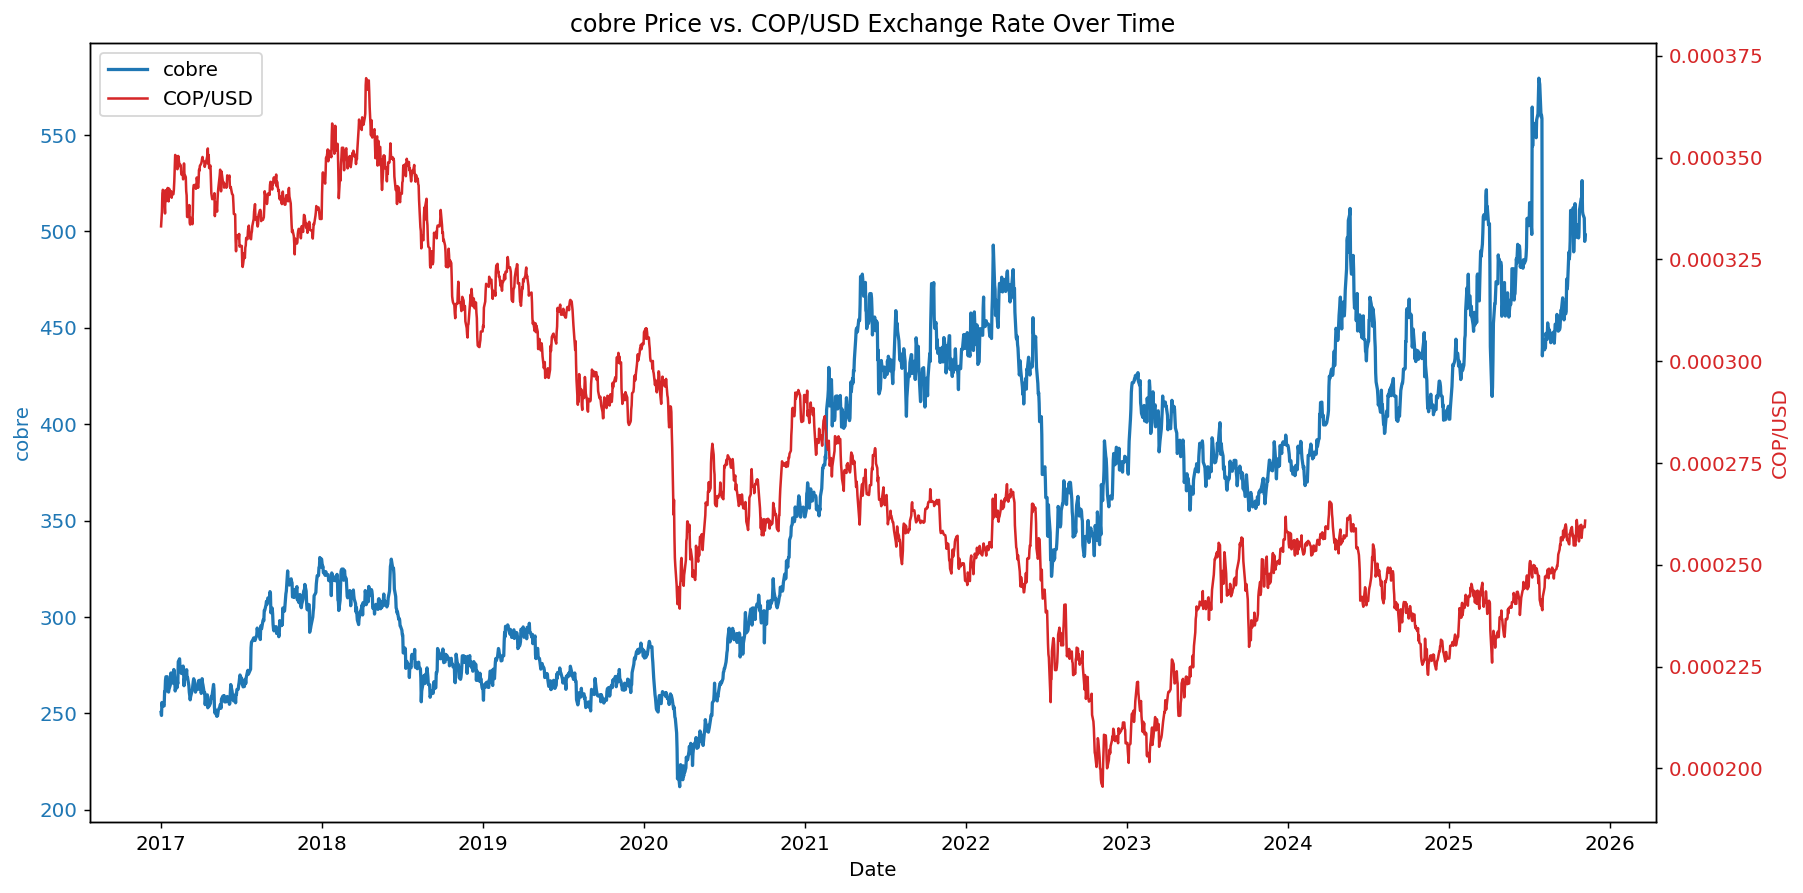

c:\Users\hugoc\anaconda3\envs\ML\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)



=== CROSS-VALIDATION: petroleo -> RUB/USD ===
Fold 1: R² = 0.0769   RMSE = 0.005963
Fold 2: R² = 0.2302   RMSE = 0.009189
Fold 3: R² = -0.0246   RMSE = 0.026977
Fold 4: R² = -0.0469   RMSE = 0.010250
Fold 5: R² = -0.0355   RMSE = 0.014141
Mean R² (CV):   0.0400
Mean RMSE (CV): 0.013304

R² Train (Plot Split): 0.0193
R² Val   (Plot Split): -0.0321


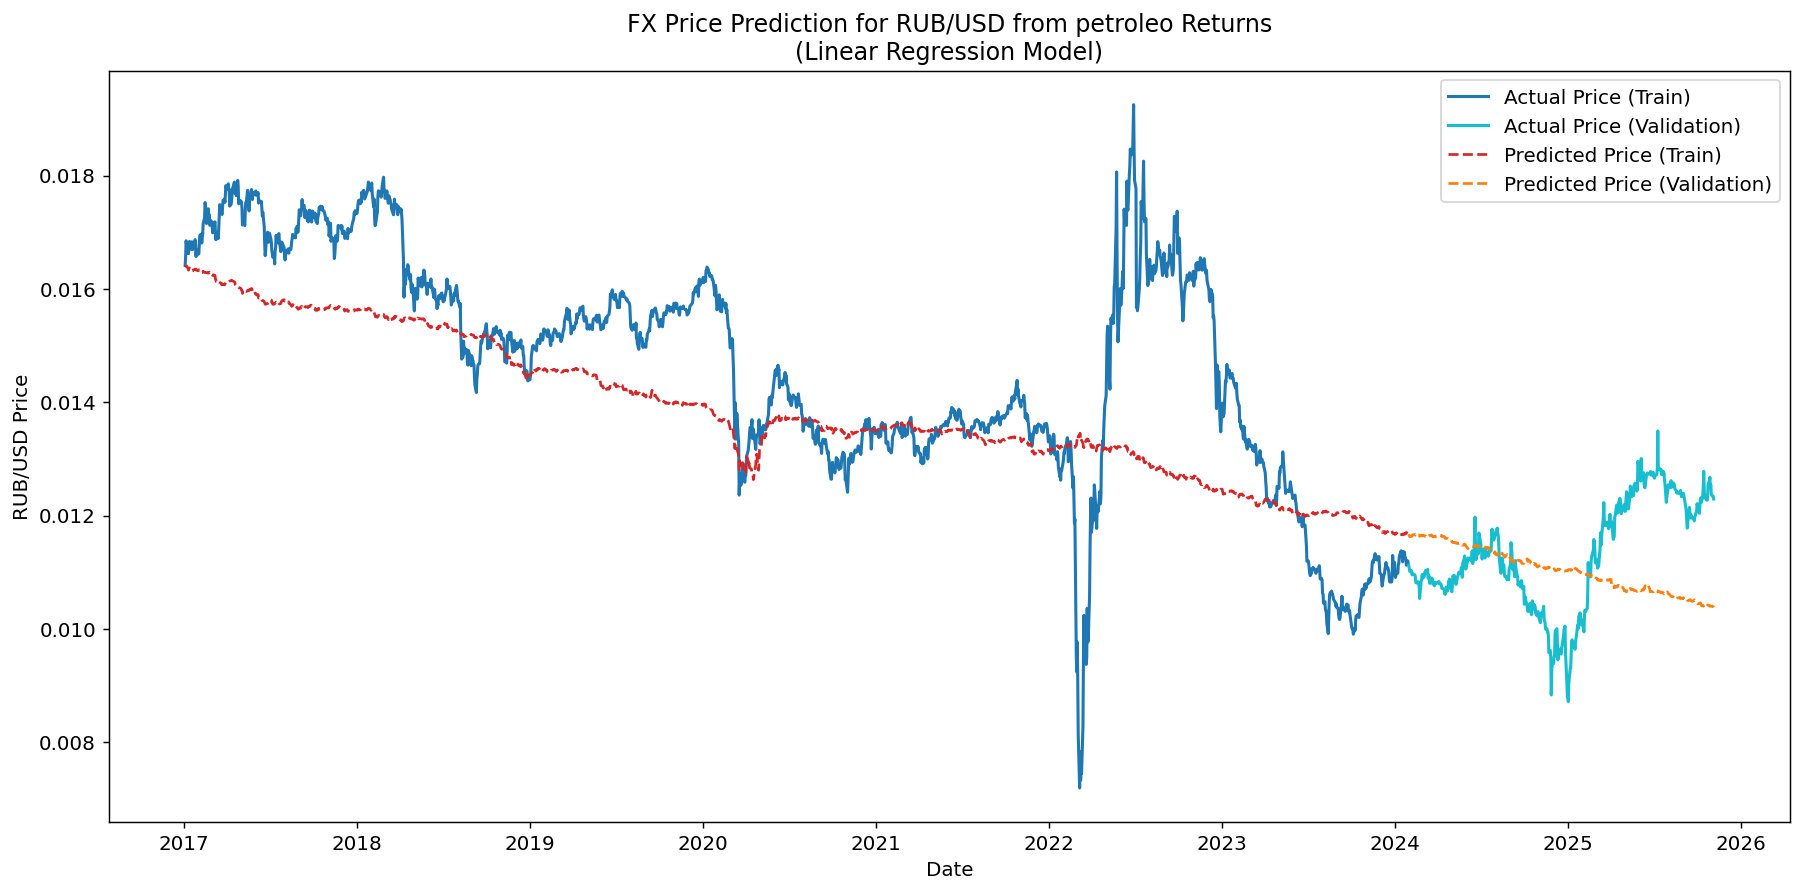

c:\Users\hugoc\anaconda3\envs\ML\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)



=== CROSS-VALIDATION: petroleo -> NOK/USD ===
Fold 1: R² = 0.0350   RMSE = 0.004692
Fold 2: R² = 0.1038   RMSE = 0.009319
Fold 3: R² = 0.1158   RMSE = 0.008271
Fold 4: R² = 0.0958   RMSE = 0.007239
Fold 5: R² = 0.0394   RMSE = 0.006159
Mean R² (CV):   0.0780
Mean RMSE (CV): 0.007136

R² Train (Plot Split): 0.1115
R² Val   (Plot Split): 0.0289


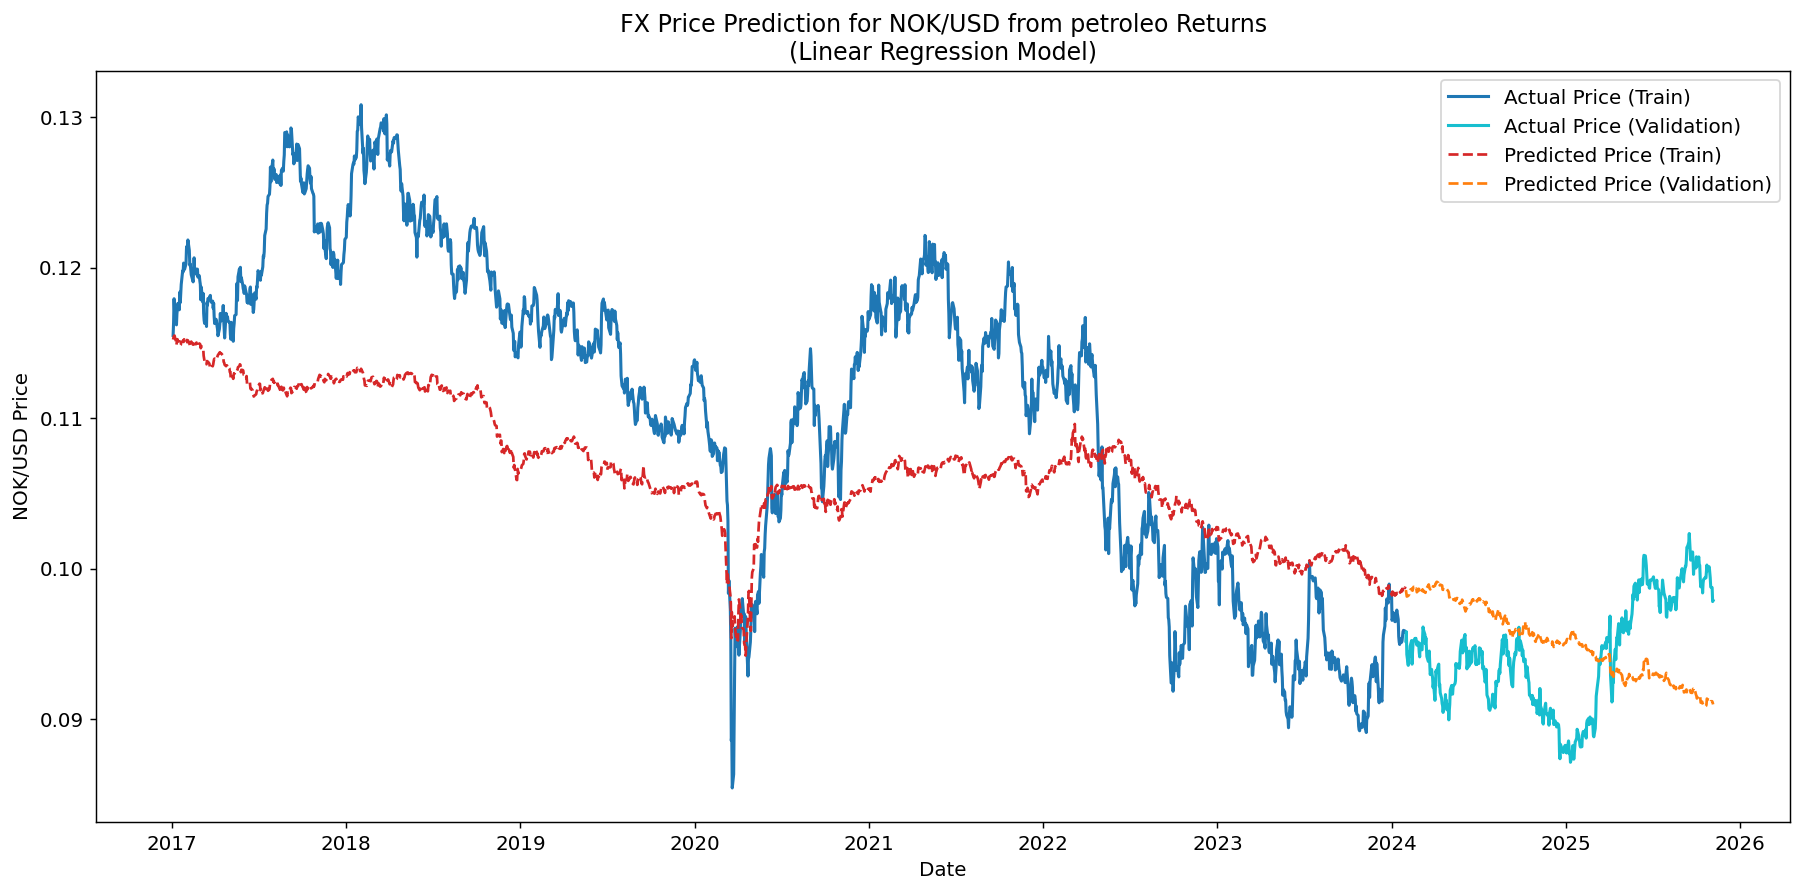

c:\Users\hugoc\anaconda3\envs\ML\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)



=== CROSS-VALIDATION: petroleo -> CAD/USD ===
Fold 1: R² = 0.0566   RMSE = 0.003393
Fold 2: R² = -0.1442   RMSE = 0.005086
Fold 3: R² = 0.1182   RMSE = 0.004645
Fold 4: R² = 0.0683   RMSE = 0.003595
Fold 5: R² = -0.0484   RMSE = 0.003301
Mean R² (CV):   0.0101
Mean RMSE (CV): 0.004004

R² Train (Plot Split): 0.0949
R² Val   (Plot Split): -0.0488


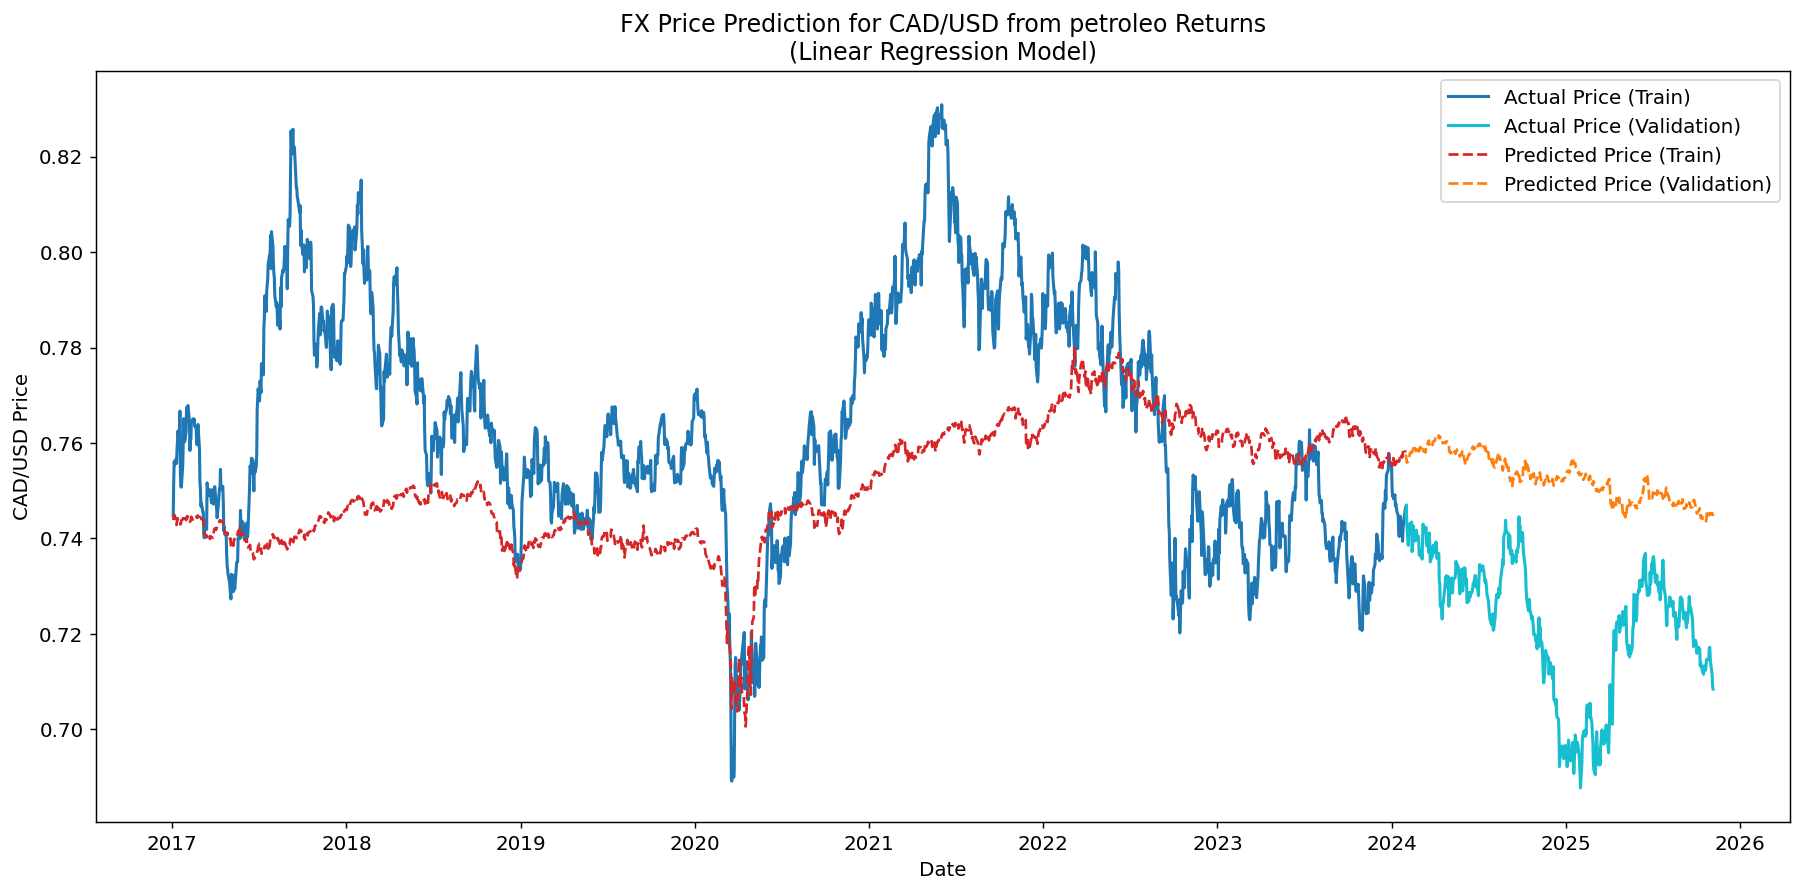


=== CROSS-VALIDATION: oro -> EUR/USD ===
Fold 1: R² = 0.1710   RMSE = 0.003196
Fold 2: R² = -0.0789   RMSE = 0.004552
Fold 3: R² = 0.1008   RMSE = 0.005135
Fold 4: R² = 0.1444   RMSE = 0.003999
Fold 5: R² = 0.1230   RMSE = 0.004455
Mean R² (CV):   0.0920
Mean RMSE (CV): 0.004267

R² Train (Plot Split): 0.1146
R² Val   (Plot Split): 0.1170


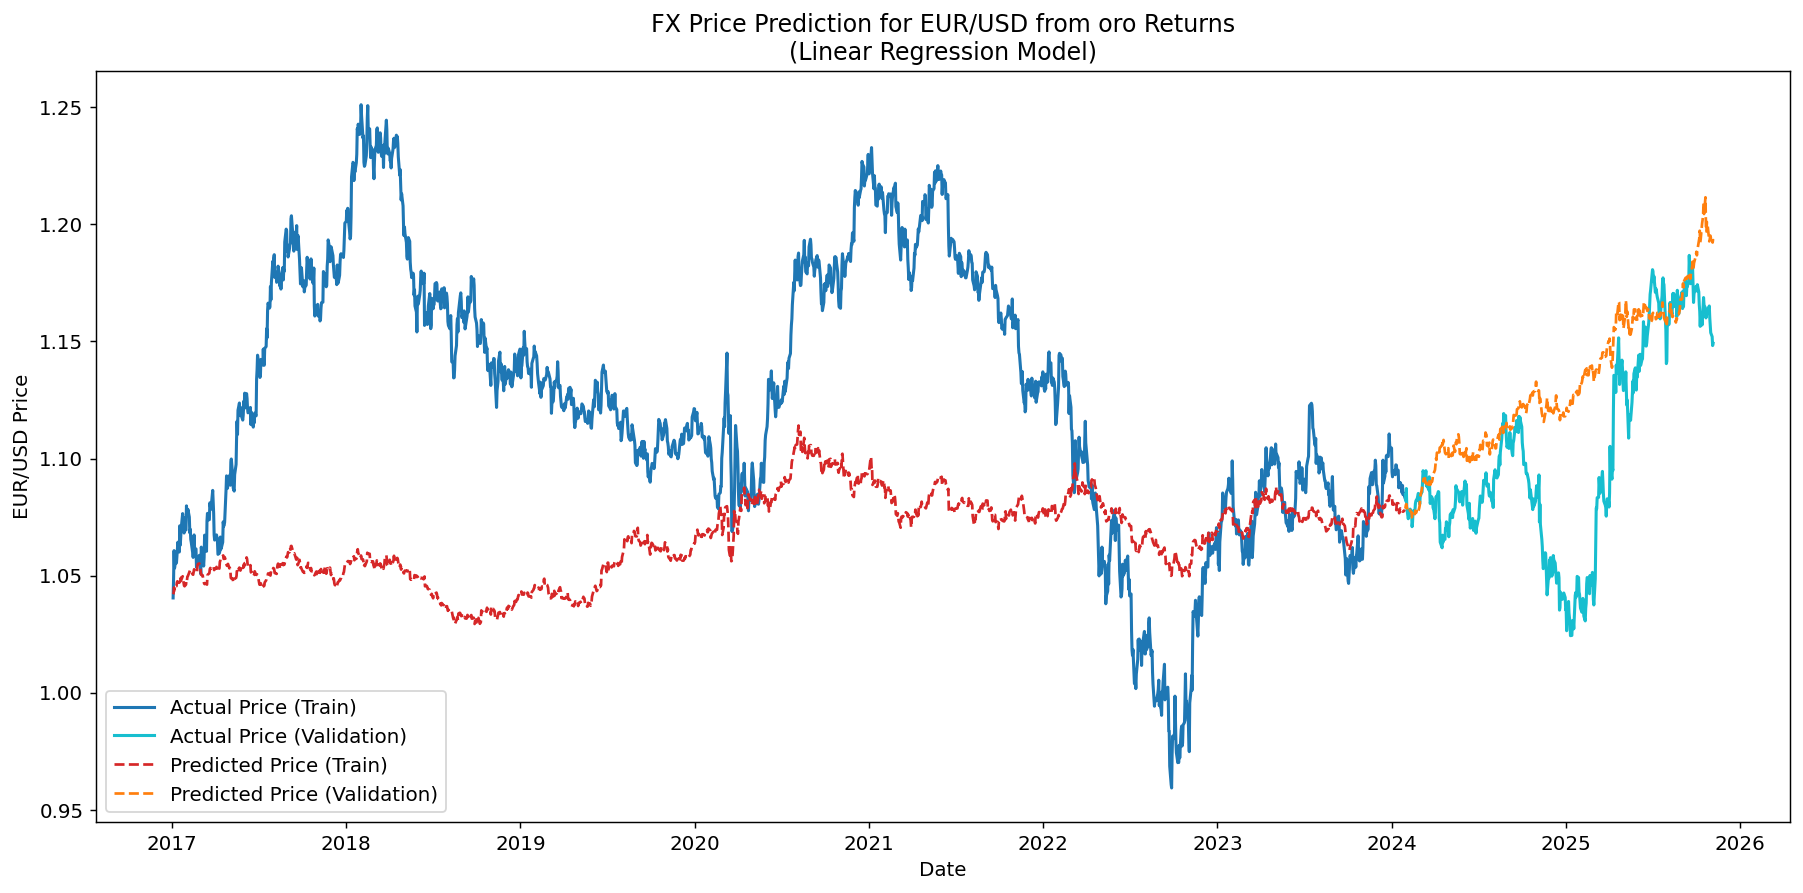


=== CROSS-VALIDATION: cobre -> CLP/USD ===
Fold 1: R² = 0.1297   RMSE = 0.006468
Fold 2: R² = 0.0880   RMSE = 0.007666
Fold 3: R² = 0.1237   RMSE = 0.010660
Fold 4: R² = 0.1452   RMSE = 0.007949
Fold 5: R² = -0.0107   RMSE = 0.007059
Mean R² (CV):   0.0952
Mean RMSE (CV): 0.007960

R² Train (Plot Split): 0.1254
R² Val   (Plot Split): 0.0272


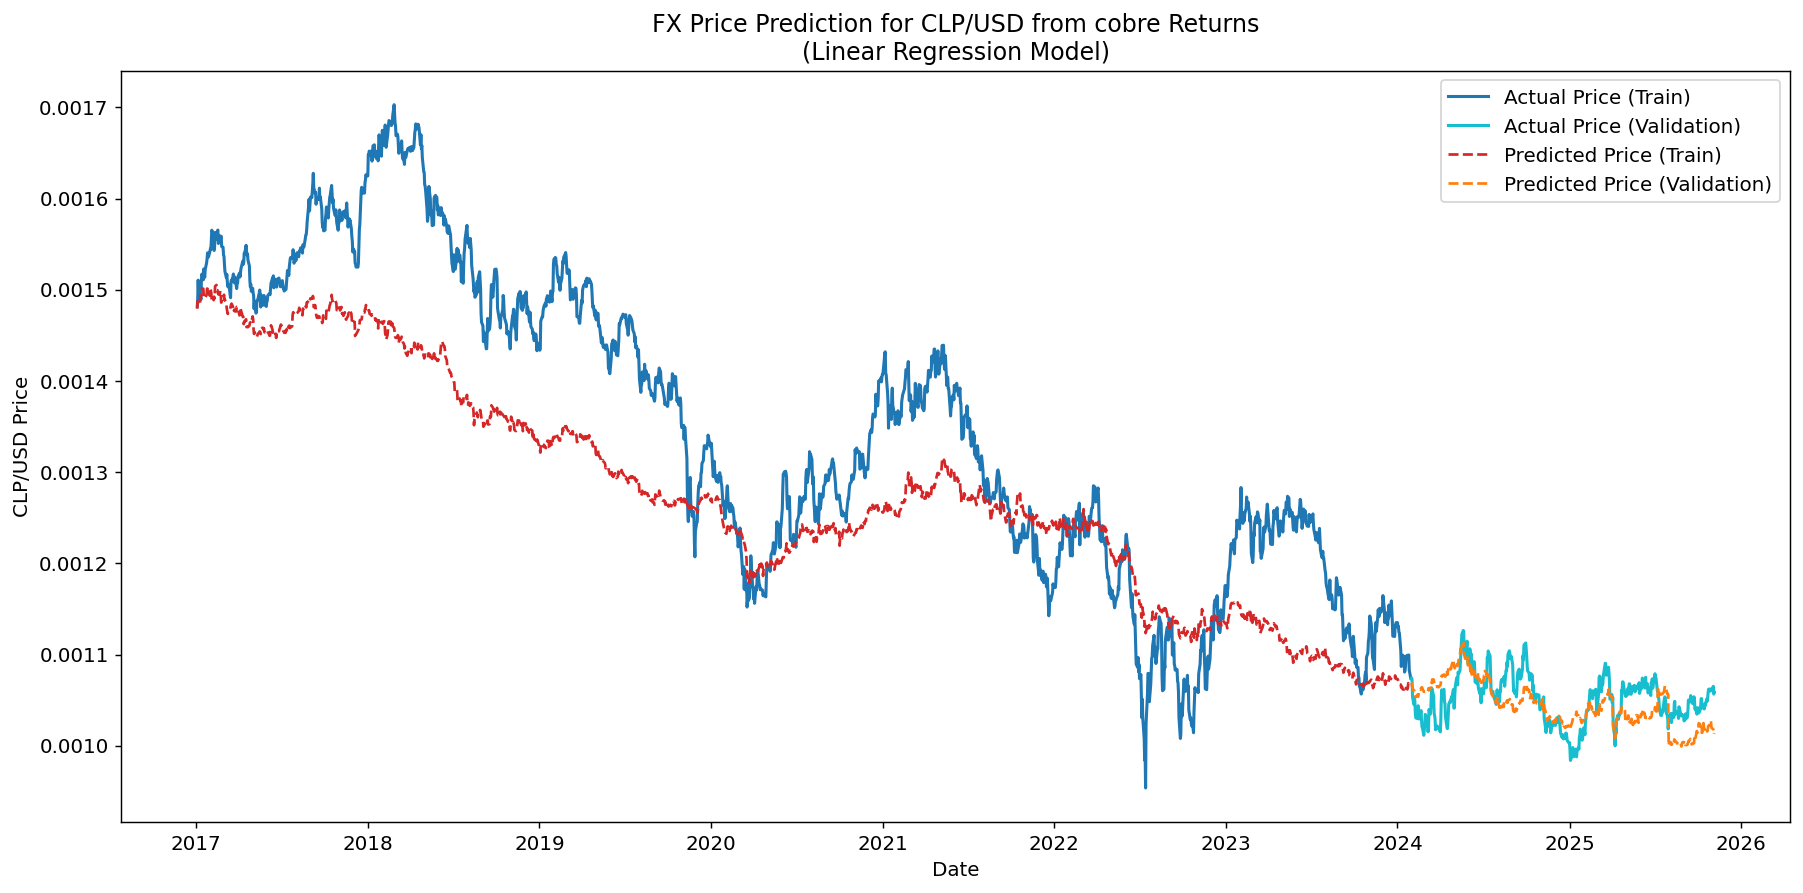


=== CROSS-VALIDATION: cobre -> COP/USD ===
Fold 1: R² = 0.1011   RMSE = 0.006324
Fold 2: R² = 0.1058   RMSE = 0.008413
Fold 3: R² = 0.0730   RMSE = 0.008644
Fold 4: R² = 0.0731   RMSE = 0.008436
Fold 5: R² = -0.0188   RMSE = 0.007313
Mean R² (CV):   0.0668
Mean RMSE (CV): 0.007826

R² Train (Plot Split): 0.0895
R² Val   (Plot Split): -0.0210


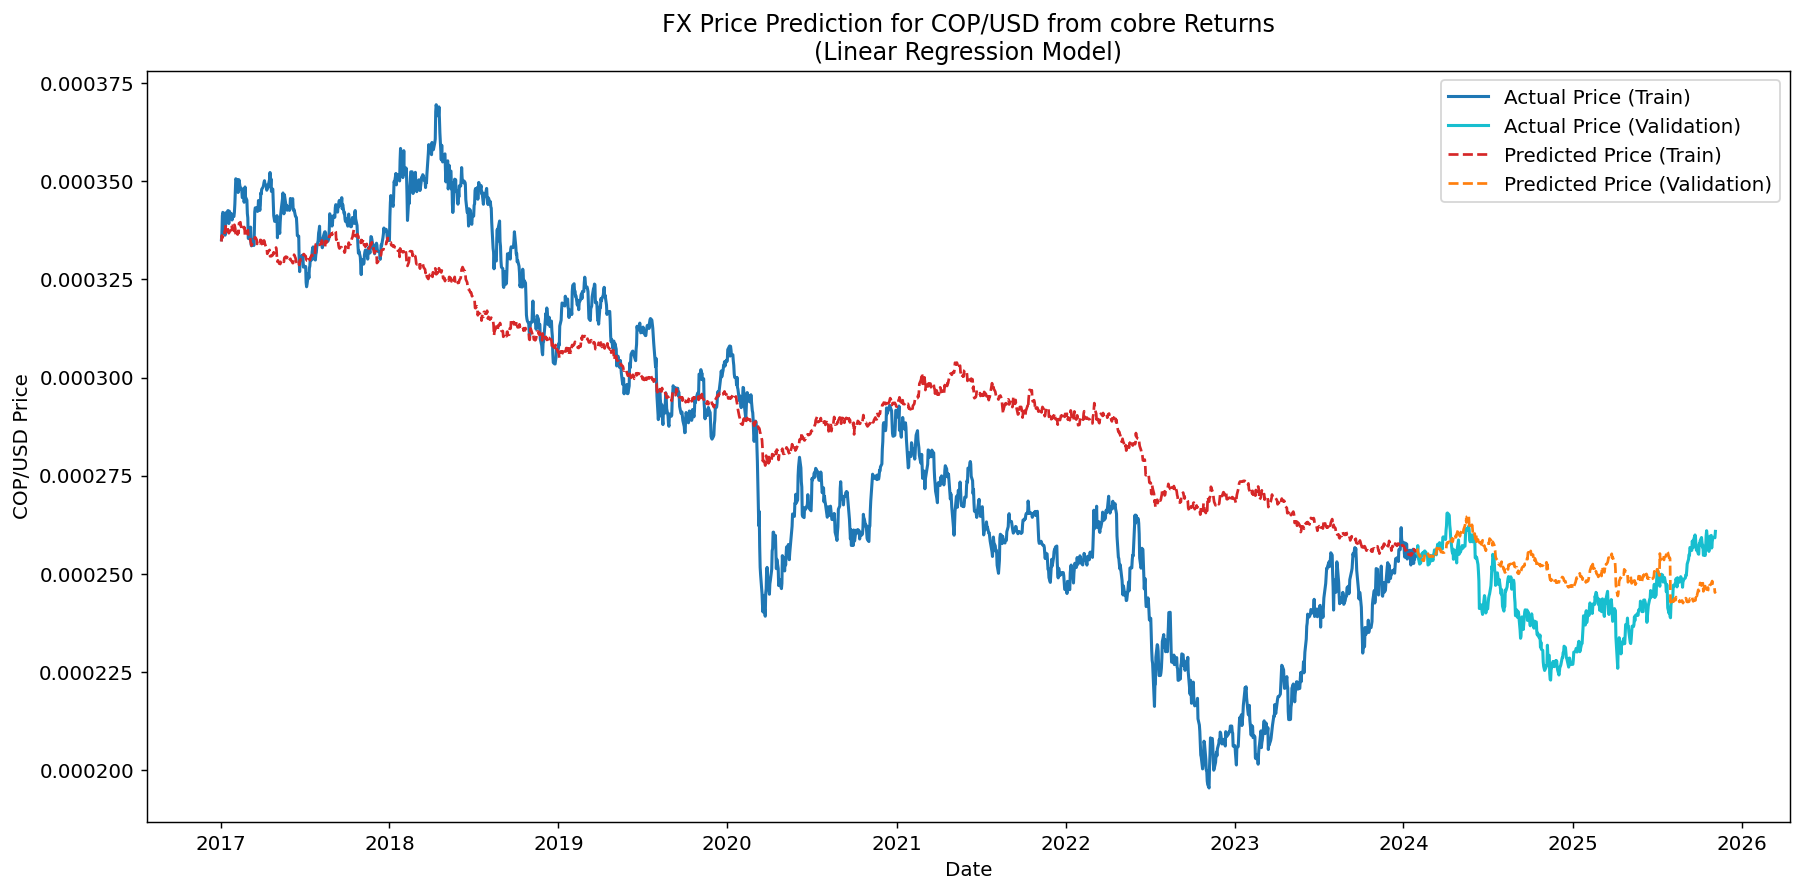

In [ ]:
# -*- coding: utf-8 -*-
"""
Commodity and FX (Foreign Exchange) Correlation Analysis

This script performs a time-series analysis between commodity prices and
selected exchange rates (FX) using the 'COMMODITIES_FX.xlsx' dataset.

Key functionalities include:
1. Visualization: Time-series plot of commodity price vs. FX rate (Dual-Y axis plot).
2. Prediction: Forecasting the FX rate price based on the commodity price using
   Linear Regression combined with TimeSeriesSplit Cross-Validation.
3. Model Evaluation: Calculation of R-squared (R²) and Root Mean Square Error (RMSE)
   to assess the model's predictive fit.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from functools import reduce

# ============================================================
# 0. CONFIGURACIÓN Y CARGA DE DATOS (Mantenida)
# ============================================================

# 🛑 PATH TO THE INPUT EXCEL FILE.
#    ASSUMES 'COMMODITIES_FX.xlsx' IS IN THE SAME DIRECTORY AS THIS SCRIPT.
RUTA_EXCEL = "COMMODITIES_FX.xlsx" 

# ... el resto de tu código

# Default settings for plot size and quality
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['figure.dpi'] = 130
plt.rcParams['font.size'] = 11

# ============================================================
# 1. DATA LOADING AND PREPROCESSING
#    (Adapted to the specific structure of COMMODITIES_FX.xlsx)
# ============================================================

# --- Sheet1: Oil (Petroleo) + RUB/USD, NOK/USD, CAD/USD ---
h1 = pd.read_excel(RUTA_EXCEL, sheet_name="Hoja1", header=2)
# Drop the 'Dates' label row, which is a structural artifact from the Excel file
h1 = h1[h1['Unnamed: 0'] != 'Dates'].copy()
h1.rename(columns={
    'Unnamed: 0': 'Date',
    'Last Price': 'petroleo',
    'Last Price.1': 'RUB/USD',
    'Last Price.2': 'NOK/USD',
    'Last Price.3': 'CAD/USD'
}, inplace=True)
h1['Date'] = pd.to_datetime(h1['Date'])
for c in ['petroleo', 'RUB/USD', 'NOK/USD', 'CAD/USD']:
    h1[c] = pd.to_numeric(h1[c], errors='coerce')

# --- Sheet2: Gold (Oro) + EUR/USD ---
h2 = pd.read_excel(RUTA_EXCEL, sheet_name="Hoja2", header=3)
# Drop the 'Dates' label row
h2 = h2[h2['Unnamed: 0'] != 'Dates'].copy()
h2.rename(columns={
    'Unnamed: 0': 'Date',
    'Last Price': 'oro',
    'Last Price.1': 'EUR/USD'
}, inplace=True)
h2['Date'] = pd.to_datetime(h2['Date'])
for c in ['oro', 'EUR/USD']:
    h2[c] = pd.to_numeric(h2[c], errors='coerce')

# --- Sheet3: Copper (Cobre) + CLP/USD, COP/USD ---
h3 = pd.read_excel(RUTA_EXCEL, sheet_name="Hoja3", header=3)
h3.rename(columns={
    'Dates': 'Date',
    'PX_LAST': 'cobre',
    'PX_LAST.1': 'CLP/USD',
    'PX_LAST.2': 'COP/USD'
}, inplace=True)
h3['Date'] = pd.to_datetime(h3['Date'])
for c in ['cobre', 'CLP/USD', 'COP/USD']:
    h3[c] = pd.to_numeric(h3[c], errors='coerce')

# --- Merge all sheets into a single DataFrame 'df' ---
dfs = [
    h1[['Date', 'petroleo', 'RUB/USD', 'NOK/USD', 'CAD/USD']],
    h2[['Date', 'oro', 'EUR/USD']],
    h3[['Date', 'cobre', 'CLP/USD', 'COP/USD']]
]

# Merge dataframes on the 'Date' column using an inner join
df = reduce(lambda left, right: pd.merge(left, right, on='Date', how='inner'), dfs)
# Sort by date and set 'Date' as the index
df = df.sort_values('Date').set_index('Date')

print("Available columns in the final DataFrame 'df':")
print(df.columns)


# ============================================================
# 2. VISUALIZATION 1: COMMODITY PRICE VS FX RATE OVER TIME
# ============================================================

def grafico_precio_vs_divisa(df, commodity_col, fx_col):
    """
    Plots a time-series graph with two Y-axes to compare:
    - The commodity price (e.g., 'petroleo') on the left axis (Blue).
    - The FX rate (e.g., 'RUB/USD') on the right axis (Red).

    Parameters:
        df (pd.DataFrame): The main DataFrame containing commodity and FX data.
        commodity_col (str): The column name for the commodity price (X variable).
        fx_col (str): The column name for the FX rate (Y variable).
    """

    fig, ax1 = plt.subplots()

    ax1.plot(df.index, df[commodity_col], label=commodity_col, linewidth=1.8)
    ax1.set_xlabel("Date") # Translated plot label
    ax1.set_ylabel(commodity_col, color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.plot(df.index, df[fx_col], label=fx_col, color='tab:red', linewidth=1.4)
    ax2.set_ylabel(fx_col, color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.title(f"{commodity_col} Price vs. {fx_col} Exchange Rate Over Time") # Translated plot title
    plt.tight_layout()
    plt.show()


# ============================================================
# 3. LINEAR REGRESSION, CROSS-VALIDATION, AND PREDICTION PLOT
# ============================================================

def regresion_cv_y_grafico(df, commodity_col, fx_col, n_splits=5, val_frac=0.2):
    """
    Performs Linear Regression modeling of FX returns based on Commodity returns.

    The process includes:
    1. Calculation of logarithmic returns for both series.
    2. TimeSeriesSplit Cross-Validation (CV) for the model: r_fx ~ r_commodity.
       The R² and RMSE for each fold, and their mean, are printed.
    3. A final train/validation split (for visualization purposes):
       - Fit the final Linear Regression model on the training set.
       - Reconstruct the predicted FX price from the predicted returns.
       - Plot the results, showing:
         * Actual FX Price (Train and Validation sets in different colors)
         * Predicted FX Price (Train and Validation sets in different colors)

    Parameters:
        df (pd.DataFrame): The main DataFrame.
        commodity_col (str): Commodity column name (independent variable).
        fx_col (str): FX column name (dependent variable).
        n_splits (int): Number of splits for TimeSeriesSplit CV.
        val_frac (float): Fraction of the data to reserve for the final validation set.
    """

    # --- Prepare data: select series and calculate returns ---
    precios = df[[commodity_col, fx_col]].dropna()
    # Calculate Logarithmic Returns: r_t = ln(P_t / P_{t-1})
    returns = np.log(precios / precios.shift(1)).dropna()

    X = returns[[commodity_col]].values.reshape(-1, 1) # Feature (Commodity Returns)
    y = returns[fx_col].values                        # Target (FX Returns)
    fechas = returns.index

    # -------- CROSS-VALIDATION (TimeSeriesSplit) ----------
    tscv = TimeSeriesSplit(n_splits=n_splits)
    r2_folds = []
    rmse_folds = []

    print(f"\n=== CROSS-VALIDATION: {commodity_col} -> {fx_col} ===")
    fold_num = 1
    for train_idx, val_idx in tscv.split(X):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        modelo = LinearRegression()
        modelo.fit(X_train, y_train)
        y_val_pred = modelo.predict(X_val)

        r2 = r2_score(y_val, y_val_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        r2_folds.append(r2)
        rmse_folds.append(rmse)

        print(f"Fold {fold_num}: R² = {r2:.4f}   RMSE = {rmse:.6f}") # Translated output
        fold_num += 1

    print(f"Mean R² (CV):   {np.mean(r2_folds):.4f}") # Translated output
    print(f"Mean RMSE (CV): {np.mean(rmse_folds):.6f}") # Translated output

    # -------- FINAL SPLIT FOR PLOTTING (Train/Validation) ----------
    split_idx = int(len(X) * (1 - val_frac))

    X_train, X_val = X[:split_idx], X[split_idx:]
    y_train, y_val = y[:split_idx], y[split_idx:]
    fechas_train, fechas_val = fechas[:split_idx], fechas[split_idx:]

    modelo_final = LinearRegression()
    modelo_final.fit(X_train, y_train)

    y_pred_train = modelo_final.predict(X_train)
    y_pred_val = modelo_final.predict(X_val)

    # R² for this specific split (useful for reporting)
    r2_train = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_val, y_pred_val)
    print(f"\nR² Train (Plot Split): {r2_train:.4f}") # Translated output
    print(f"R² Val   (Plot Split): {r2_val:.4f}") # Translated output

    # -------- RECONSTRUCT PREDICTED FX PRICE --------
    fx_prices = precios[fx_col].loc[fechas]  # Actual FX prices aligned with returns
    pred_returns_full = np.concatenate([y_pred_train, y_pred_val])

    # Reconstruct the predicted price series P_t = P_{t-1} * exp(r_t)
    # Start reconstruction from the first actual price
    pred_price = [fx_prices.iloc[0]]
    for r in pred_returns_full:
        pred_price.append(pred_price[-1] * np.exp(r))
    pred_price = pd.Series(pred_price[1:], index=fechas)

    # -------- PLOT: ACTUAL vs PREDICTED PRICE (Color-coded by split) --------
    plt.figure()
    # Actual prices
    plt.plot(fechas_train, fx_prices.loc[fechas_train],
             label="Actual Price (Train)", color="tab:blue", linewidth=1.7) # Translated label
    plt.plot(fechas_val, fx_prices.loc[fechas_val],
             label="Actual Price (Validation)", color="tab:cyan", linewidth=1.7) # Translated label

    # Predicted prices
    plt.plot(fechas_train, pred_price.loc[fechas_train],
             label="Predicted Price (Train)", color="tab:red", # Translated label
             linestyle="--", linewidth=1.5)
    plt.plot(fechas_val, pred_price.loc[fechas_val],
             label="Predicted Price (Validation)", color="tab:orange", # Translated label
             linestyle="--", linewidth=1.5)

    plt.title(f"FX Price Prediction for {fx_col} from {commodity_col} Returns\n"
              f"(Linear Regression Model)") # Translated plot title
    plt.xlabel("Date") # Translated plot label
    plt.ylabel(f"{fx_col} Price") # Translated plot label
    plt.legend()
    plt.tight_layout()
    plt.show()


# ============================================================
# 4. EXECUTION EXAMPLES FOR COMMODITY-FX PAIRS
# ============================================================

# 1) Plot Commodity vs FX (Price over time)
# - Oil (Petroleo) with RUB/USD, NOK/USD, CAD/USD
grafico_precio_vs_divisa(df, "petroleo", "RUB/USD")
grafico_precio_vs_divisa(df, "petroleo", "NOK/USD")
grafico_precio_vs_divisa(df, "petroleo", "CAD/USD")

# - Gold (Oro) with EUR/USD
grafico_precio_vs_divisa(df, "oro", "EUR/USD")

# - Copper (Cobre) with CLP/USD and COP/USD
grafico_precio_vs_divisa(df, "cobre", "CLP/USD")
grafico_precio_vs_divisa(df, "cobre", "COP/USD")

# 2) Regression + Cross-Validation + Prediction Plot
# (Comment out any pairs you don't wish to run)

regresion_cv_y_grafico(df, "petroleo", "RUB/USD")
regresion_cv_y_grafico(df, "petroleo", "NOK/USD")
regresion_cv_y_grafico(df, "petroleo", "CAD/USD")

regresion_cv_y_grafico(df, "oro", "EUR/USD")

regresion_cv_y_grafico(df, "cobre", "CLP/USD")
regresion_cv_y_grafico(df, "cobre", "COP/USD")

# ============================================================
# 3. VISUALIZATION 2: SCATTER PLOT OF DAILY RETURNS
# ============================================================

c:\Users\hugoc\anaconda3\envs\ML\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


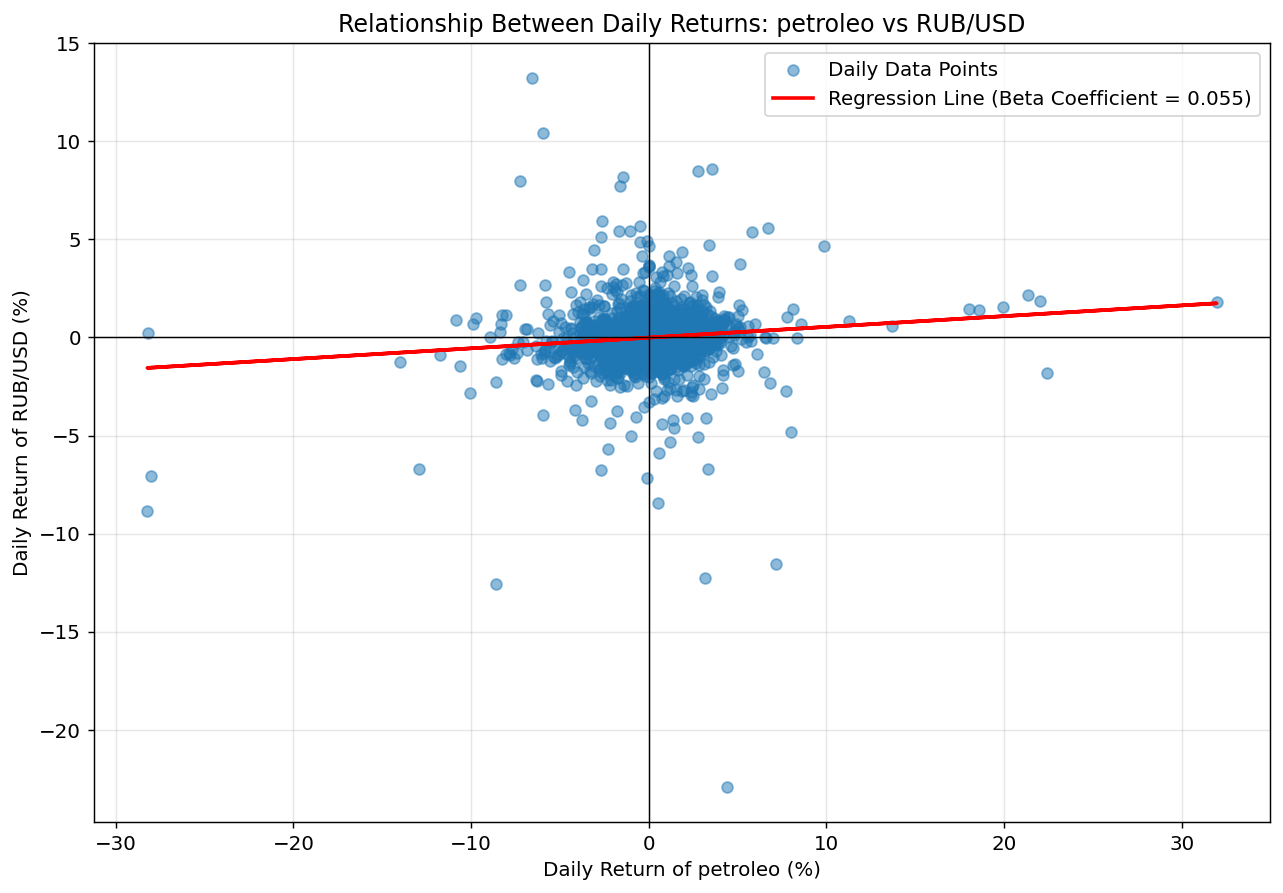

c:\Users\hugoc\anaconda3\envs\ML\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


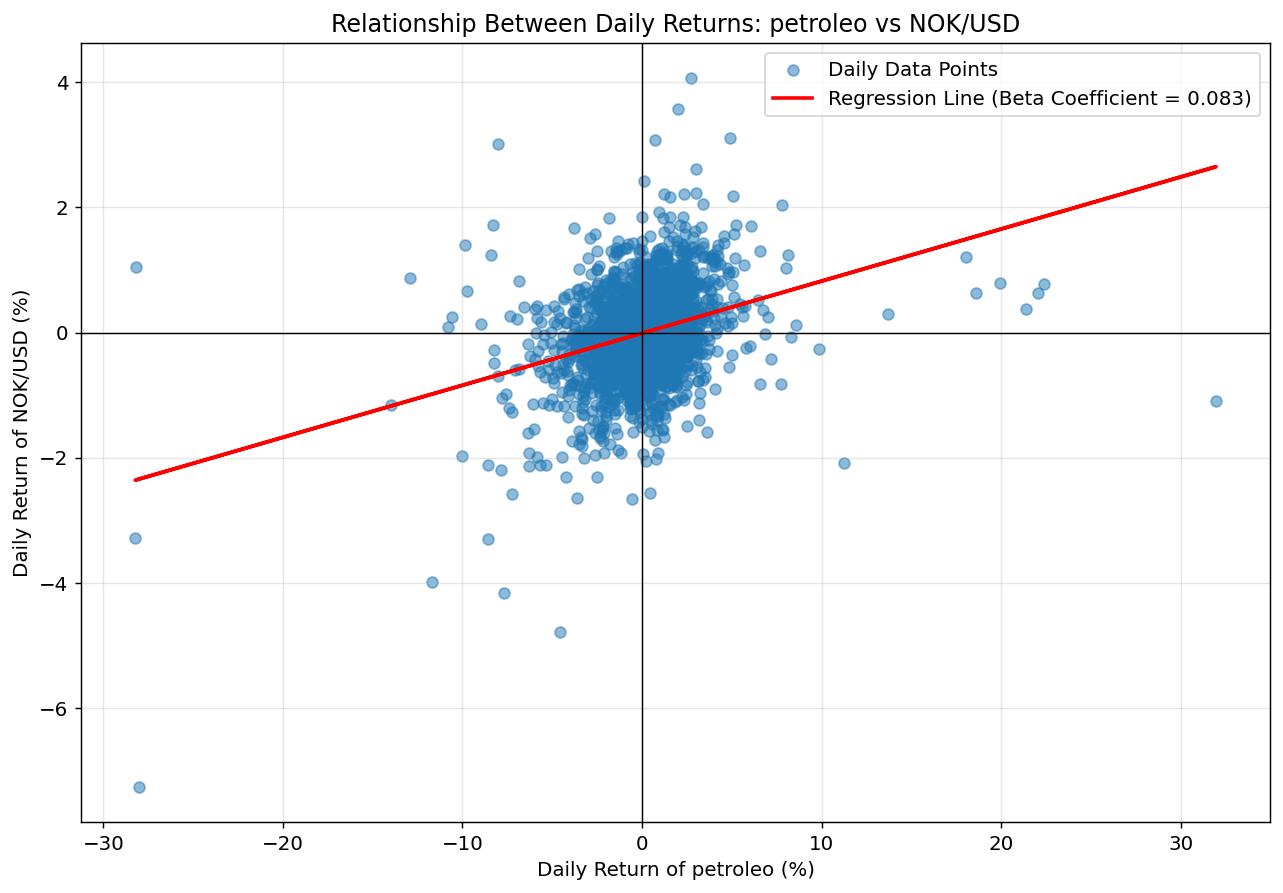

c:\Users\hugoc\anaconda3\envs\ML\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


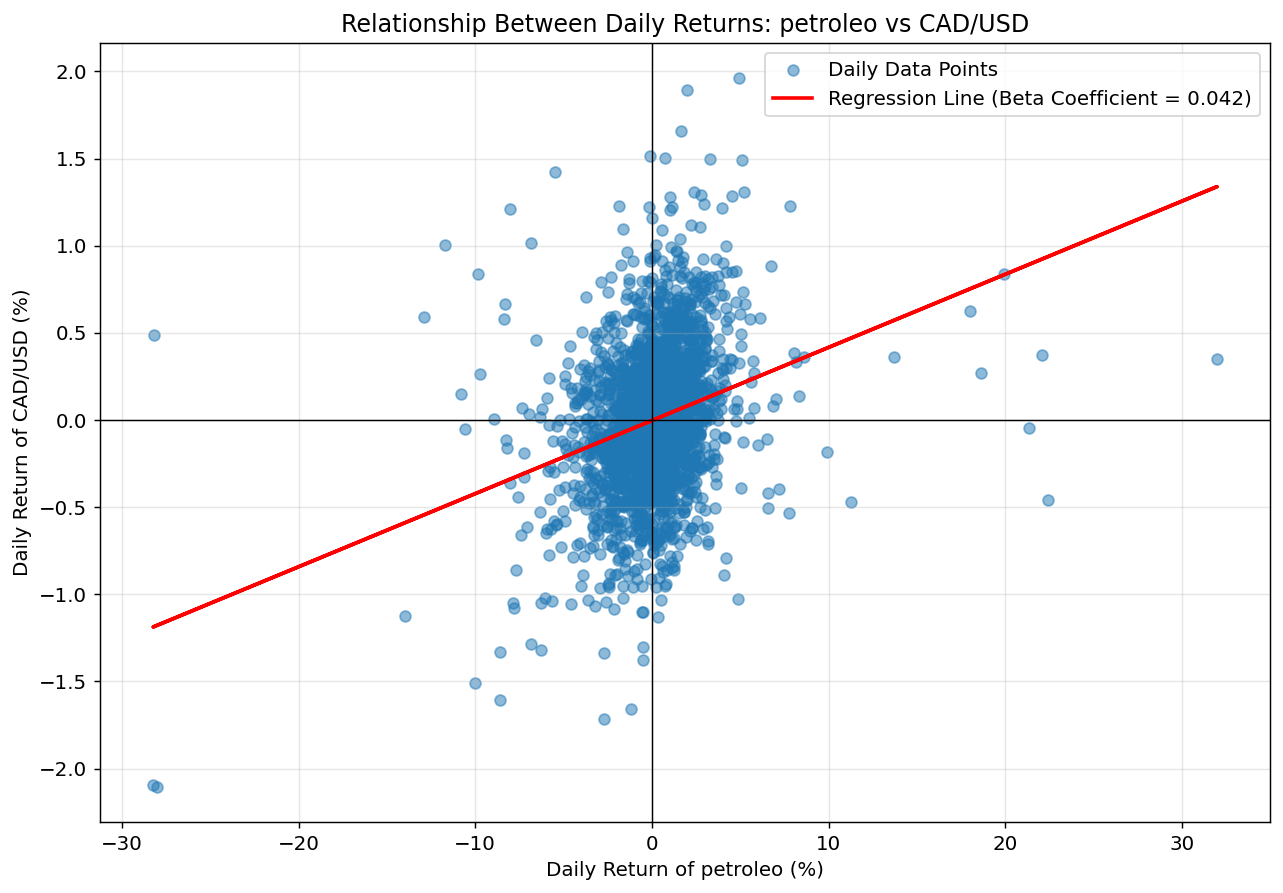

In [5]:
def grafico_rendimientos_porcentaje(df, commodity_col, fx_col):
    """
    Generates a scatter plot showing the relationship between:
    - Percentage returns of the commodity (X-axis)
    - Percentage returns of the FX currency (Y-axis)
    A linear regression line is included to quantify the relationship (Beta).

    Parameters:
        df (pd.DataFrame): The main DataFrame.
        commodity_col (str): Commodity column name (X variable).
        fx_col (str): FX column name (Y variable).
    """

    # Select relevant columns and drop NaNs
    precios = df[[commodity_col, fx_col]].dropna()

    # Calculate log returns, then convert to approximate percentage returns
    returns = np.log(precios / precios.shift(1)).dropna()
    ret_commodity = returns[commodity_col] * 100    # Convert to percentage
    ret_fx = returns[fx_col] * 100

    # Fit Linear Regression model to plot the correlation line
    model = LinearRegression()
    model.fit(ret_commodity.values.reshape(-1, 1), ret_fx.values)
    fx_pred_line = model.predict(ret_commodity.values.reshape(-1, 1))

    # Scatter Plot
    plt.figure(figsize=(10, 7))
    plt.scatter(ret_commodity, ret_fx, alpha=0.5, color="tab:blue", label="Daily Data Points")

    # Regression line plot
    plt.plot(ret_commodity, fx_pred_line, color="red", linewidth=2,
             label=f"Regression Line (Beta Coefficient = {model.coef_[0]:.3f})")

    # Aesthetics and labels
    plt.axhline(0, color="black", linewidth=0.8)
    plt.axvline(0, color="black", linewidth=0.8)
    plt.title(f"Relationship Between Daily Returns: {commodity_col} vs {fx_col}")
    plt.xlabel(f"Daily Return of {commodity_col} (%)")
    plt.ylabel(f"Daily Return of {fx_col} (%)")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# --- Visualization: Oil (Petroleo) Returns vs. FX Currencies Returns ---
grafico_rendimientos_porcentaje(df, "petroleo", "RUB/USD")
grafico_rendimientos_porcentaje(df, "petroleo", "NOK/USD")
grafico_rendimientos_porcentaje(df, "petroleo", "CAD/USD")

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor # 👈 Advanced Model: XGBoost
from functools import reduce

# ============================================================
# 0. CONFIGURATION & DATA LOADING (PRESERVATION OF USER'S LOGIC)
# ============================================================

# 🛑 PATH TO YOUR EXCEL FILE. ENSURE IT IS EXACT:
EXCEL_PATH = r"C:\Users\hugoc\Desktop\Cunef\Aprendizaje Automático\COMMODITIES_FX.xlsx"

# Plotting configuration
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['figure.dpi'] = 130

# --- DATA LOADING AND CLEANING (Using original pd.read_excel logic) ---

# Sheet 1: Oil (petroleo, RUB/USD, NOK/USD, CAD/USD)
h1 = pd.read_excel(EXCEL_PATH, sheet_name="Hoja1", header=2)
# Drop the structural 'Dates' label row
h1 = h1[h1['Unnamed: 0'] != 'Dates'].copy()
h1.rename(columns={
    'Unnamed: 0': 'Date',
    'Last Price': 'petroleo',
    'Last Price.1': 'RUB/USD',
    'Last Price.2': 'NOK/USD',
    'Last Price.3': 'CAD/USD'
}, inplace=True)
h1['Date'] = pd.to_datetime(h1['Date'])
for c in ['petroleo', 'RUB/USD', 'NOK/USD', 'CAD/USD']:
    h1[c] = pd.to_numeric(h1[c], errors='coerce')

# Sheet 2: Gold (oro, EUR/USD)
h2 = pd.read_excel(EXCEL_PATH, sheet_name="Hoja2", header=3)
# Drop the structural 'Dates' label row
h2 = h2[h2['Unnamed: 0'] != 'Dates'].copy()
h2.rename(columns={
    'Unnamed: 0': 'Date',
    'Last Price': 'oro',
    'Last Price.1': 'EUR/USD'
}, inplace=True)
h2['Date'] = pd.to_datetime(h2['Date'])
for c in ['oro', 'EUR/USD']:
    h2[c] = pd.to_numeric(h2[c], errors='coerce')

# Sheet 3: Copper (cobre, CLP/USD, COP/USD)
h3 = pd.read_excel(EXCEL_PATH, sheet_name="Hoja3", header=3)
h3.rename(columns={
    'Dates': 'Date',
    'PX_LAST': 'cobre',
    'PX_LAST.1': 'CLP/USD',
    'PX_LAST.2': 'COP/USD'
}, inplace=True)
h3['Date'] = pd.to_datetime(h3['Date'])
for c in ['cobre', 'CLP/USD', 'COP/USD']:
    h3[c] = pd.to_numeric(h3[c], errors='coerce')

# Merge all sheets into a single DataFrame 'df_merged'
dfs = [
    h1[['Date', 'petroleo', 'RUB/USD', 'NOK/USD', 'CAD/USD']],
    h2[['Date', 'oro', 'EUR/USD']],
    h3[['Date', 'cobre', 'CLP/USD', 'COP/USD']]
]

df_merged = reduce(lambda left, right: pd.merge(left, right, on='Date', how='inner'), dfs)
df_merged = df_merged.sort_values('Date').set_index('Date')
print(f"Base data loaded. Total rows: {len(df_merged)}")

# ----------------------------------------------------------------------------------------------------

# ============================================================
# 2. ADVANCED FEATURE ENGINEERING
# ============================================================

def feature_engineering(df):
    """
    Creates Log Returns, Lagged Returns, and Moving Averages as predictive features.
    
    The target variable for modeling is the FX Log Return.
    Predictive features (X) are created only for commodity prices.
    """
    df_feat = df.copy()
    
    for col in df_feat.columns:
        # 1. Log Returns (FX Log Returns are the Target variable Y)
        df_feat[f'{col}_Ret'] = np.log(df_feat[col] / df_feat[col].shift(1))
        
        # 2. Predictive Features (X) only for COMMODITIES
        if col in ['petroleo', 'oro', 'cobre']:
            # Lag 1 and 2 of the Return (Yesterday's and Day-before-Yesterday's change)
            df_feat[f'{col}_Ret_Lag1'] = df_feat[f'{col}_Ret'].shift(1)
            df_feat[f'{col}_Ret_Lag2'] = df_feat[f'{col}_Ret'].shift(2)
            
            # 5-day Moving Average (Trend, lagged one day to avoid lookahead bias)
            df_feat[f'{col}_MA5'] = df_feat[col].rolling(window=5).mean().shift(1)

    df_feat.dropna(inplace=True)
    return df_feat

df_final = feature_engineering(df_merged)
print(f"Features created. Rows available for modeling: {len(df_final)}")

# ----------------------------------------------------------------------------------------------------

# ============================================================
# 3. MODELING AND COMPARISON FUNCTION (CROSS-VALIDATION)
# ============================================================

def compare_cv_models_by_pair(df, com, fx, n_splits=5):
    """
    Trains and compares 3 models (Linear Regression, Random Forest, XGBoost) 
    using the advanced commodity features (lags and MA) to predict the FX return.
    """
    
    # Features (X): Lagged Returns and Moving Average of the Commodity
    X_cols = [f'{com}_Ret_Lag1', f'{com}_Ret_Lag2', f'{com}_MA5']
    # Target (Y): Log Return of the FX Rate
    Y_col = f'{fx}_Ret'
    
    X = df[X_cols]
    Y = df[Y_col]
    
    # Define models to compare
    modelos = {
        'LinearReg': LinearRegression(),
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
        'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.05, random_state=42, n_jobs=-1)
    }
    
    # Initialize TimeSeries Cross-Validation
    tscv = TimeSeriesSplit(n_splits=n_splits)
    resultados = {}
    
    for nombre, modelo in modelos.items():
        r2_scores = []
        rmse_scores = []
        
        # Iterate through all CV folds
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
            
            modelo.fit(X_train, Y_train)
            Y_pred = modelo.predict(X_test)
            
            r2_scores.append(r2_score(Y_test, Y_pred))
            rmse_scores.append(np.sqrt(mean_squared_error(Y_test, Y_pred)))
        
        r2_avg = np.mean(r2_scores)
        rmse_avg = np.mean(rmse_scores)
        
        resultados[nombre] = {'R2_avg': r2_avg, 'RMSE_avg': rmse_avg}
        
        # Display feature importance for tree-based models
        if nombre in ['RandomForest', 'XGBoost']:
            print(f"\n--- Feature Importance for {nombre} in {com}-{fx} ---")
            feature_importance = pd.Series(modelo.feature_importances_, index=X_cols)
            print(feature_importance.sort_values(ascending=False))
            
    return resultados

# ----------------------------------------------------------------------------------------------------

# ============================================================
# 4. MAIN EXECUTION AND RESULTS SUMMARY
# ============================================================

if __name__ == "__main__":

    # Define the commodity-FX pairs to analyze
    pares = [
        ('petroleo', 'RUB/USD'),
        ('petroleo', 'NOK/USD'),
        ('petroleo', 'CAD/USD'),
        ('oro',      'EUR/USD'),
        ('cobre',    'CLP/USD'),
        ('cobre',    'COP/USD'),
    ]

    print("\n--- STARTING ADVANCED MODELING (LR, RF, XGBOOST) ---")

    resultados_finales = {}

    for com, fx in pares:
        print(f"\n=======================================================")
        print(f"  MODELING: {com.upper()} -> {fx} (Predicting Return)")
        print(f"=======================================================")
        
        res = compare_cv_models_by_pair(df_final, com, fx, n_splits=5)
        
        resultados_finales[f'{com}-{fx}'] = res
        
        # Display summary results for the current pair
        print("\n--- Average Results (Cross-Validation) ---")
        for modelo, metrics in res.items():
            print(f"  {modelo:14s}: R² = {metrics['R2_avg']:.4f}, RMSE = {metrics['RMSE_avg']:.6f}")

    print("\n\n--- SUMMARY OF ALL RESULTS (BEST MODEL PER PAIR) ---")
    for par, res in resultados_finales.items():
        # Find the best model (the one with the highest average R²)
        mejor_modelo = max(res.items(), key=lambda x: x[1]['R2_avg'])[0]
        mejor_r2 = res[mejor_modelo]['R2_avg']
        
        print(f"Pair {par:15s} | Best Model: {mejor_modelo:14s} | Avg R²: {mejor_r2:.4f}")

Base data loaded. Total rows: 2308
Features created. Rows available for modeling: 2299

--- STARTING ADVANCED MODELING (LR, RF, XGBOOST) ---

  MODELING: PETROLEO -> RUB/USD (Predicting Return)


c:\Users\hugoc\anaconda3\envs\ML\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)



--- Feature Importance for RandomForest in petroleo-RUB/USD ---
petroleo_MA5         0.478219
petroleo_Ret_Lag1    0.272208
petroleo_Ret_Lag2    0.249573
dtype: float64

--- Feature Importance for XGBoost in petroleo-RUB/USD ---
petroleo_Ret_Lag1    0.365210
petroleo_MA5         0.358480
petroleo_Ret_Lag2    0.276311
dtype: float32

--- Average Results (Cross-Validation) ---
  LinearReg     : R² = -0.0092, RMSE = 0.013499
  RandomForest  : R² = -0.0497, RMSE = 0.013699
  XGBoost       : R² = -0.0935, RMSE = 0.013913

  MODELING: PETROLEO -> NOK/USD (Predicting Return)

--- Feature Importance for RandomForest in petroleo-NOK/USD ---
petroleo_MA5         0.351523
petroleo_Ret_Lag2    0.335914
petroleo_Ret_Lag1    0.312563
dtype: float64

--- Feature Importance for XGBoost in petroleo-NOK/USD ---
petroleo_MA5         0.401421
petroleo_Ret_Lag2    0.337331
petroleo_Ret_Lag1    0.261248
dtype: float32

--- Average Results (Cross-Validation) ---
  LinearReg     : R² = -0.0077, RMSE = 0.0074

# 🚀 Advanced Time Series Modeling: Commodity vs. FX Prediction

## 💡 Project Overview

This repository focuses on developing **predictive models** for currency exchange rate (FX) **logarithmic returns** using features engineered from highly correlated commodity prices (Oil, Gold, Copper).

The approach moves beyond simple correlation analysis by employing advanced Machine Learning techniques (Ensemble Methods) and rigorous time-series cross-validation.

### Key Goals

1.  **Feature Engineering:** Extract meaningful predictive features from commodity prices (Lags, Moving Averages).
2.  **Benchmark Comparison:** Compare the performance of a simple **Linear Regression (LR)** against complex **Ensemble Models (Random Forest, XGBoost)**.
3.  **Robust Evaluation:** Use **TimeSeriesSplit Cross-Validation (CV)** to ensure model performance is realistically assessed on chronological out-of-sample data.

---

## ⚙️ Technical Setup

### Prerequisites

You must have the following Python libraries installed:

```bash
pip install pandas numpy matplotlib scikit-learn xgboost openpyxl

Rango de fechas: 2017-01-02 00:00:00 → 2025-11-05 00:00:00
Columnas: ['petroleo', 'RUB/USD', 'NOK/USD', 'CAD/USD', 'oro', 'EUR/USD', 'cobre', 'CLP/USD', 'COP/USD']

============= petroleo → RUB/USD =============

--- Modelo: LinearRegression ---
Fold  1: R² = 0.0378   RMSE = 0.008229
Fold  2: R² = 0.1217   RMSE = 0.005950
Fold  3: R² = 0.4882   RMSE = 0.007907
Fold  4: R² = -0.5448   RMSE = 0.011363
Fold  5: R² = 0.0616   RMSE = 0.005621
Fold  6: R² = -0.0221   RMSE = 0.035676
Fold  7: R² = -0.0527   RMSE = 0.012514
Fold  8: R² = -0.0506   RMSE = 0.008845
Fold  9: R² = -0.0193   RMSE = 0.014461
Fold 10: R² = -0.0637   RMSE = 0.012812
>> R² medio folds = -0.0044
>> R² total CV    = -0.0105
>> RMSE total CV  = 0.014857

--- Modelo: Ridge ---
Fold  1: R² = 0.0380   RMSE = 0.008228
Fold  2: R² = 0.1220   RMSE = 0.005949
Fold  3: R² = 0.4879   RMSE = 0.007910
Fold  4: R² = -0.5421   RMSE = 0.011354
Fold  5: R² = 0.0617   RMSE = 0.005620
Fold  6: R² = -0.0221   RMSE = 0.035675
Fold  7: R² = 

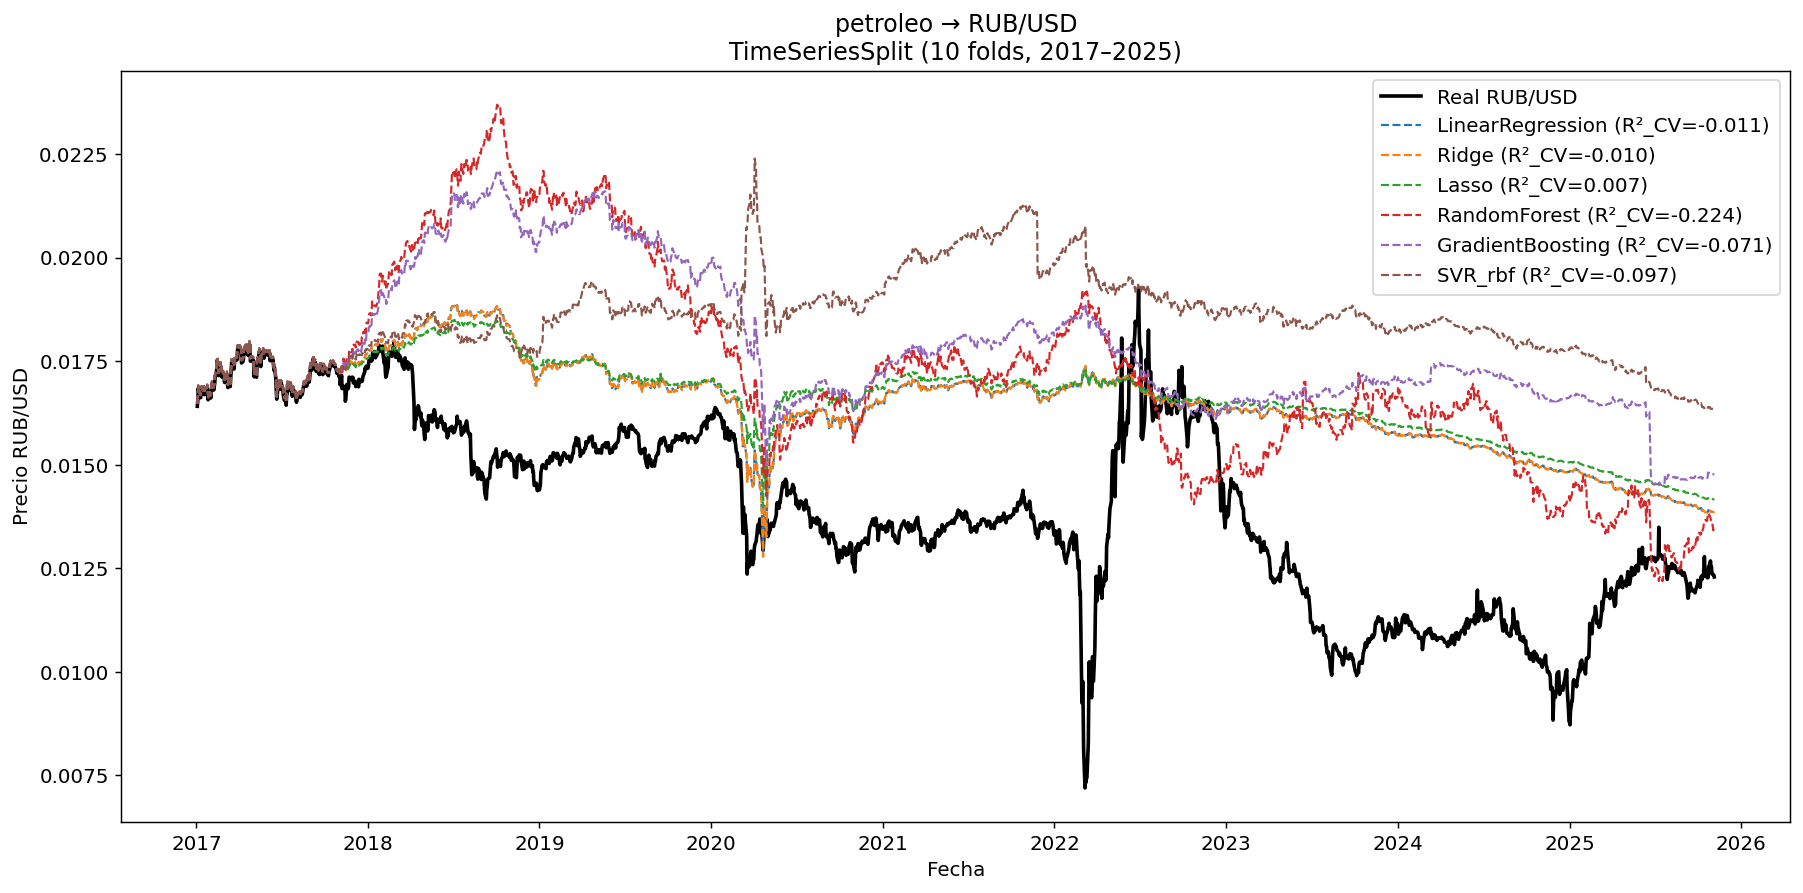


RESUMEN GLOBAL:
LinearRegression    R²_total = -0.0105   RMSE_total = 0.014857
Ridge               R²_total = -0.0104   RMSE_total = 0.014856
Lasso               R²_total = 0.0072   RMSE_total = 0.014726
RandomForest        R²_total = -0.2244   RMSE_total = 0.016354
GradientBoosting    R²_total = -0.0714   RMSE_total = 0.015298
SVR_rbf             R²_total = -0.0967   RMSE_total = 0.015478

============= petroleo → NOK/USD =============

--- Modelo: LinearRegression ---
Fold  1: R² = 0.0903   RMSE = 0.005263
Fold  2: R² = 0.0951   RMSE = 0.004654
Fold  3: R² = 0.2816   RMSE = 0.008077
Fold  4: R² = -0.3147   RMSE = 0.010255
Fold  5: R² = 0.1082   RMSE = 0.006561
Fold  6: R² = 0.0914   RMSE = 0.008218
Fold  7: R² = 0.1268   RMSE = 0.008897
Fold  8: R² = 0.0876   RMSE = 0.006878
Fold  9: R² = 0.0293   RMSE = 0.006035
Fold 10: R² = 0.0303   RMSE = 0.006360
>> R² medio folds = 0.0626
>> R² total CV    = 0.0673
>> RMSE total CV  = 0.007305

--- Modelo: Ridge ---
Fold  1: R² = 0.0902   RMSE

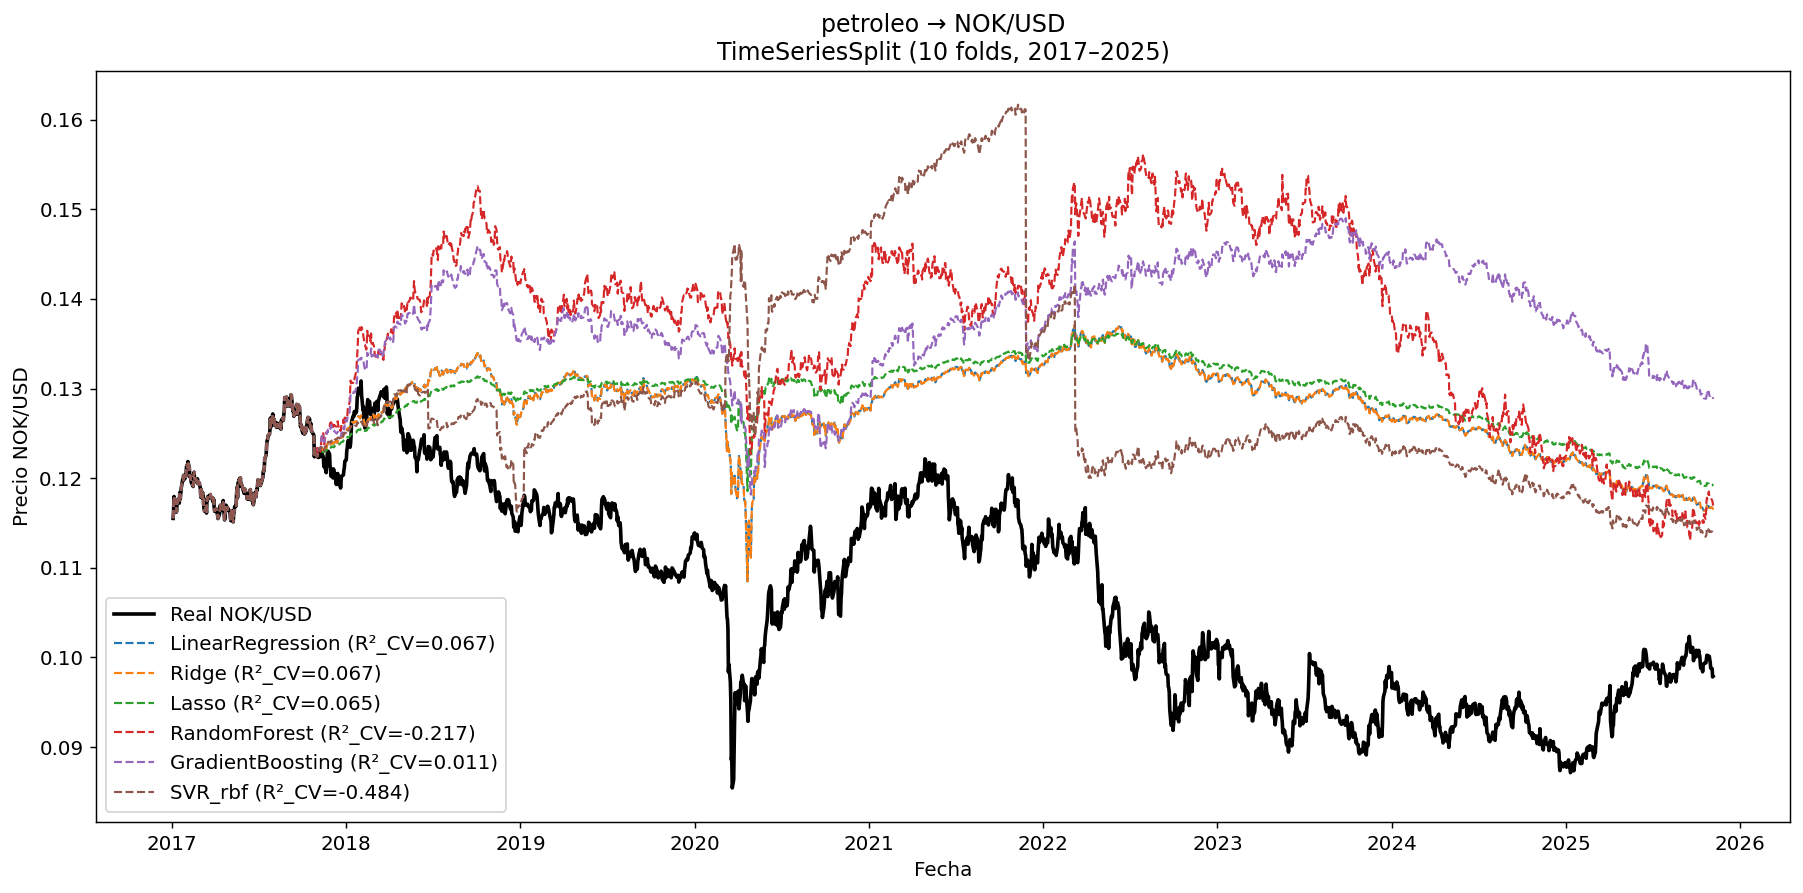


RESUMEN GLOBAL:
LinearRegression    R²_total = 0.0673   RMSE_total = 0.007305
Ridge               R²_total = 0.0675   RMSE_total = 0.007305
Lasso               R²_total = 0.0647   RMSE_total = 0.007316
RandomForest        R²_total = -0.2173   RMSE_total = 0.008346
GradientBoosting    R²_total = 0.0110   RMSE_total = 0.007523
SVR_rbf             R²_total = -0.4844   RMSE_total = 0.009216

============= petroleo → CAD/USD =============

--- Modelo: LinearRegression ---
Fold  1: R² = 0.1145   RMSE = 0.004206
Fold  2: R² = 0.1663   RMSE = 0.003381
Fold  3: R² = 0.0699   RMSE = 0.004013
Fold  4: R² = -0.2695   RMSE = 0.005364
Fold  5: R² = 0.0949   RMSE = 0.004082
Fold  6: R² = 0.0998   RMSE = 0.004390
Fold  7: R² = 0.1154   RMSE = 0.004796
Fold  8: R² = 0.0479   RMSE = 0.003180
Fold  9: R² = -0.0254   RMSE = 0.002975
Fold 10: R² = -0.0600   RMSE = 0.003580
>> R² medio folds = 0.0354
>> R² total CV    = 0.0385
>> RMSE total CV  = 0.004059

--- Modelo: Ridge ---
Fold  1: R² = 0.1144   RMSE 

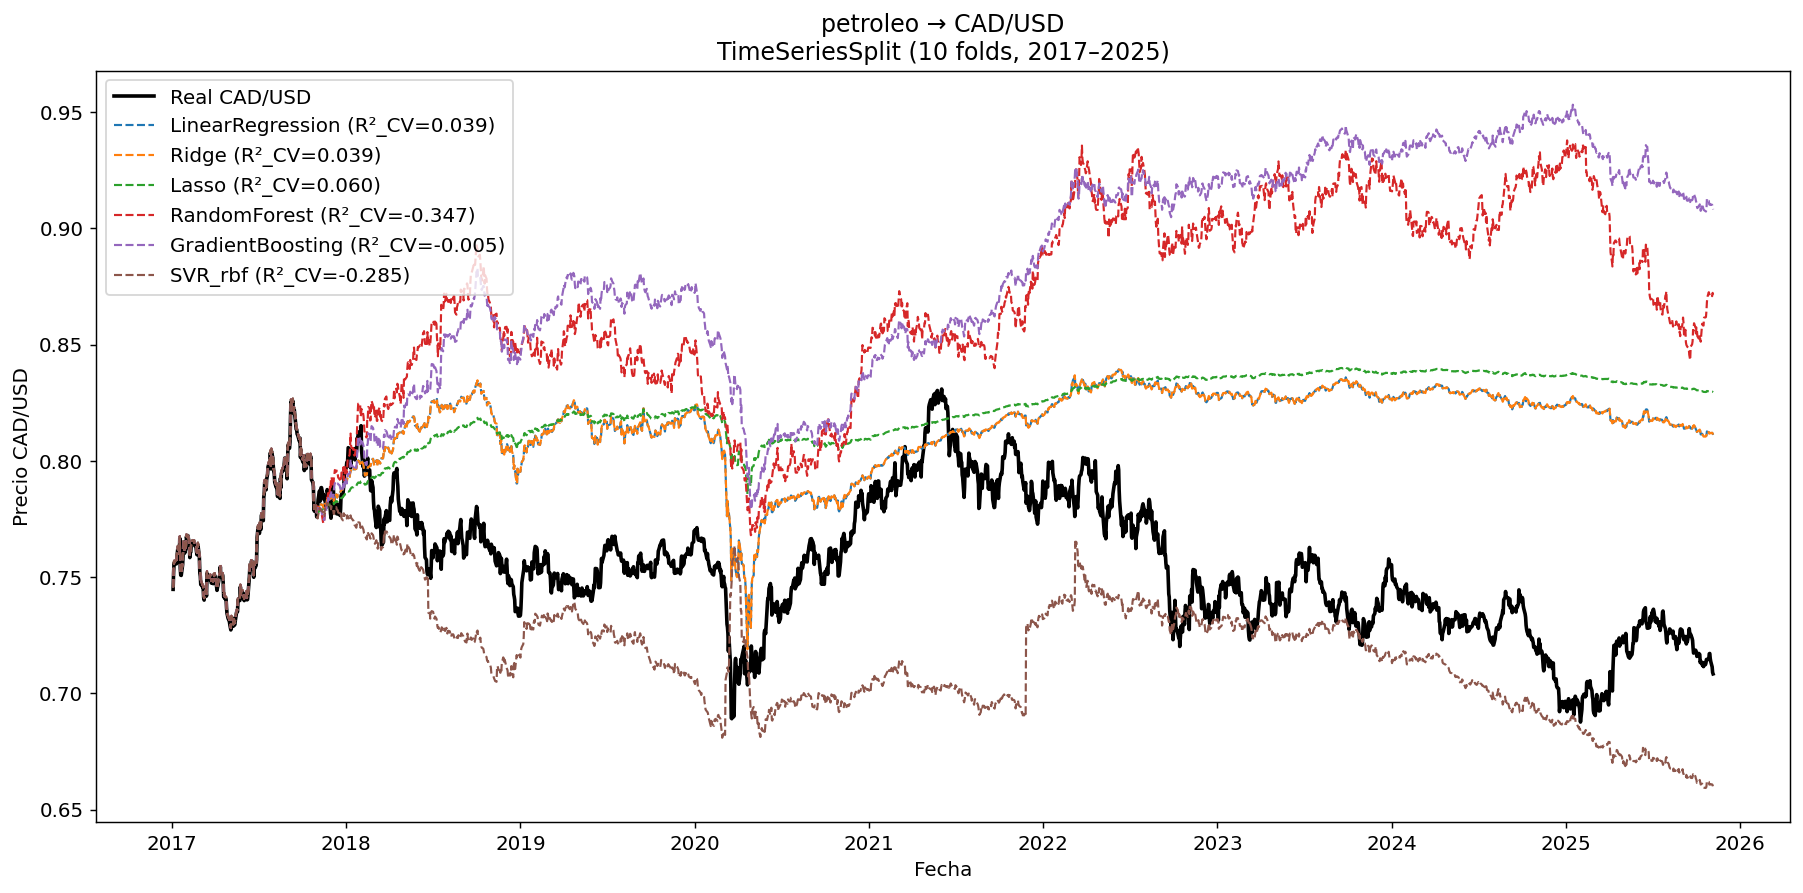


RESUMEN GLOBAL:
LinearRegression    R²_total = 0.0385   RMSE_total = 0.004059
Ridge               R²_total = 0.0388   RMSE_total = 0.004058
Lasso               R²_total = 0.0604   RMSE_total = 0.004012
RandomForest        R²_total = -0.3473   RMSE_total = 0.004804
GradientBoosting    R²_total = -0.0049   RMSE_total = 0.004149
SVR_rbf             R²_total = -0.2845   RMSE_total = 0.004691

============= oro → EUR/USD =============

--- Modelo: LinearRegression ---
Fold  1: R² = 0.1702   RMSE = 0.004077
Fold  2: R² = 0.2350   RMSE = 0.003214
Fold  3: R² = -0.2159   RMSE = 0.004609
Fold  4: R² = 0.0022   RMSE = 0.004061
Fold  5: R² = 0.1975   RMSE = 0.003076
Fold  6: R² = -0.0032   RMSE = 0.005393
Fold  7: R² = 0.2003   RMSE = 0.005327
Fold  8: R² = 0.1048   RMSE = 0.003826
Fold  9: R² = -0.0053   RMSE = 0.003946
Fold 10: R² = 0.1755   RMSE = 0.004800
>> R² medio folds = 0.0861
>> R² total CV    = 0.0974
>> RMSE total CV  = 0.004299

--- Modelo: Ridge ---
Fold  1: R² = 0.1699   RMSE = 0.

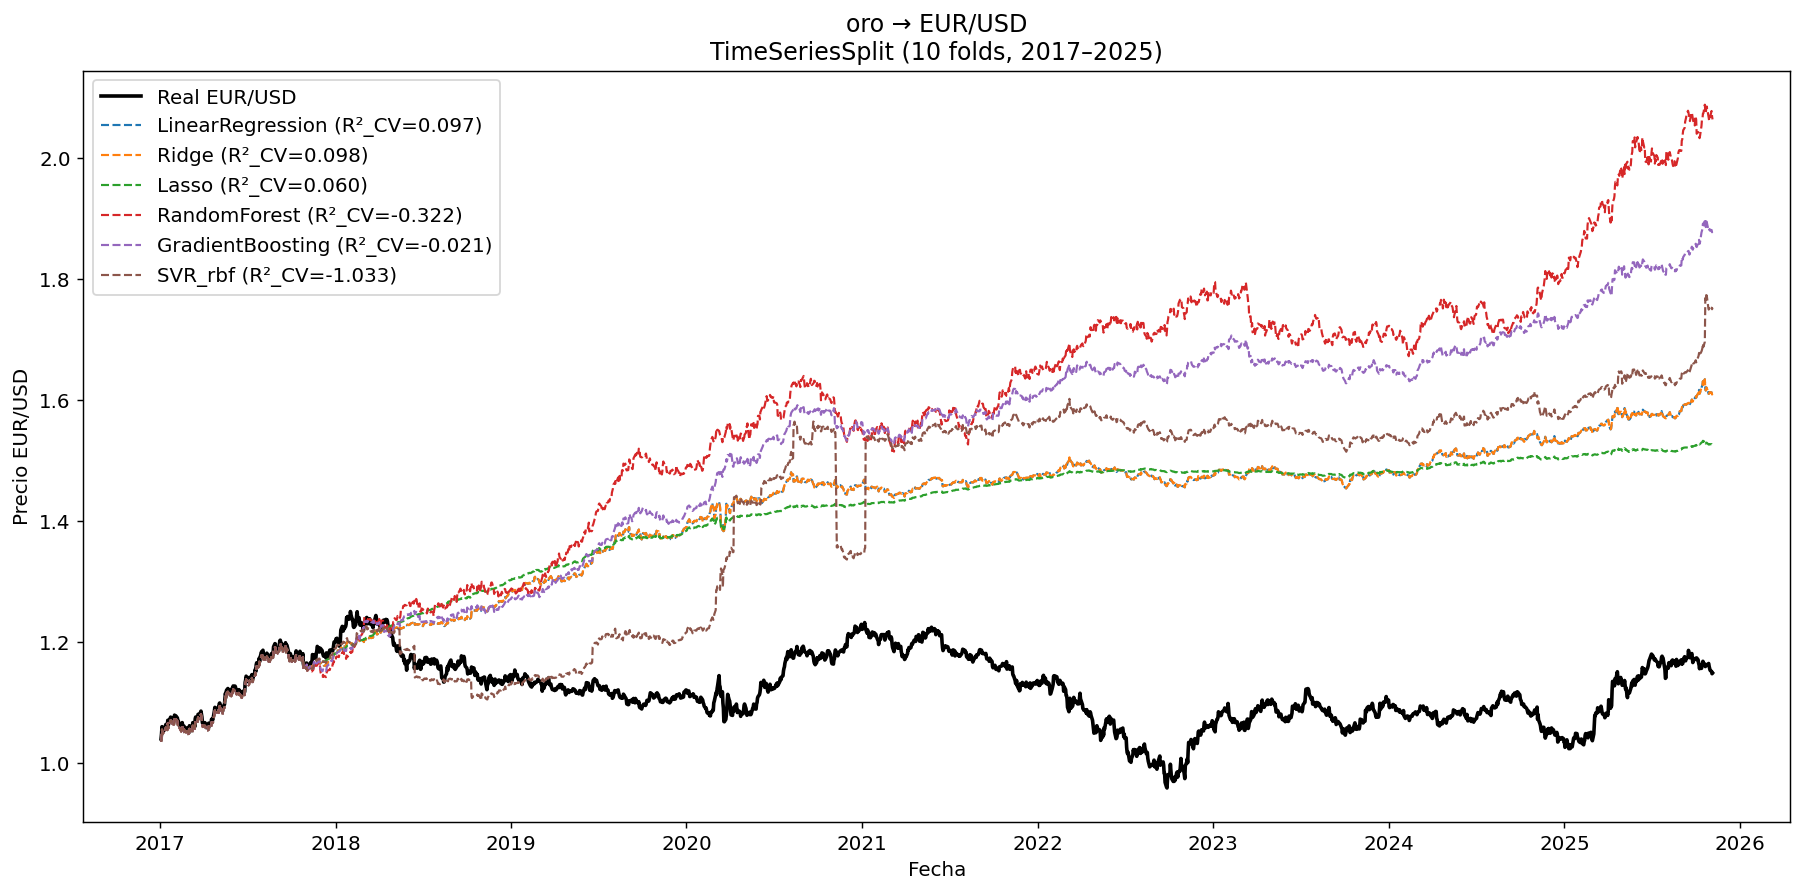


RESUMEN GLOBAL:
LinearRegression    R²_total = 0.0974   RMSE_total = 0.004299
Ridge               R²_total = 0.0975   RMSE_total = 0.004299
Lasso               R²_total = 0.0603   RMSE_total = 0.004387
RandomForest        R²_total = -0.3223   RMSE_total = 0.005204
GradientBoosting    R²_total = -0.0214   RMSE_total = 0.004574
SVR_rbf             R²_total = -1.0331   RMSE_total = 0.006453

============= cobre → CLP/USD =============

--- Modelo: LinearRegression ---
Fold  1: R² = 0.1386   RMSE = 0.005533
Fold  2: R² = 0.1910   RMSE = 0.005532
Fold  3: R² = 0.1182   RMSE = 0.007758
Fold  4: R² = 0.0688   RMSE = 0.007605
Fold  5: R² = 0.0167   RMSE = 0.007160
Fold  6: R² = 0.1291   RMSE = 0.011693
Fold  7: R² = 0.1563   RMSE = 0.009696
Fold  8: R² = 0.0870   RMSE = 0.007833
Fold  9: R² = 0.2831   RMSE = 0.006379
Fold 10: R² = -0.3291   RMSE = 0.007970
>> R² medio folds = 0.0860
>> R² total CV    = 0.1032
>> RMSE total CV  = 0.007917

--- Modelo: Ridge ---
Fold  1: R² = 0.1382   RMSE = 0.

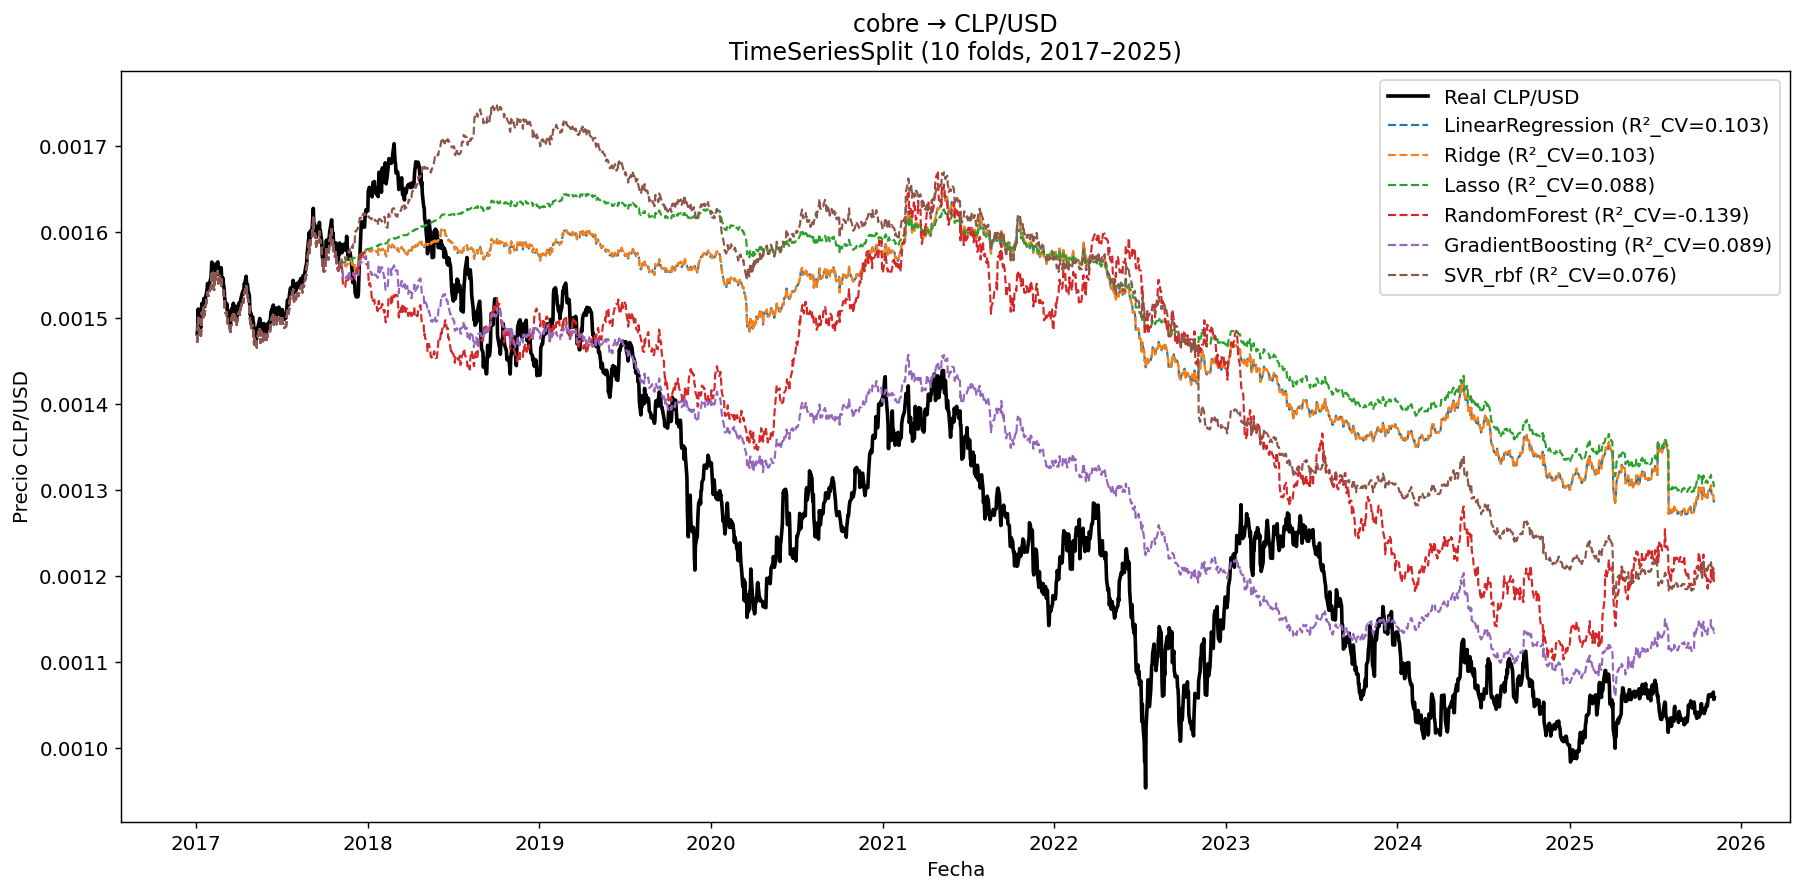


RESUMEN GLOBAL:
LinearRegression    R²_total = 0.1032   RMSE_total = 0.007917
Ridge               R²_total = 0.1031   RMSE_total = 0.007917
Lasso               R²_total = 0.0879   RMSE_total = 0.007984
RandomForest        R²_total = -0.1393   RMSE_total = 0.008924
GradientBoosting    R²_total = 0.0887   RMSE_total = 0.007981
SVR_rbf             R²_total = 0.0762   RMSE_total = 0.008035

============= cobre → COP/USD =============

--- Modelo: LinearRegression ---
Fold  1: R² = 0.0107   RMSE = 0.007093
Fold  2: R² = 0.1098   RMSE = 0.006122
Fold  3: R² = 0.1438   RMSE = 0.008296
Fold  4: R² = 0.1051   RMSE = 0.007823
Fold  5: R² = -0.1326   RMSE = 0.007013
Fold  6: R² = 0.1029   RMSE = 0.009102
Fold  7: R² = 0.0923   RMSE = 0.009579
Fold  8: R² = 0.0773   RMSE = 0.008163
Fold  9: R² = 0.1287   RMSE = 0.006621
Fold 10: R² = -0.1653   RMSE = 0.007857
>> R² medio folds = 0.0473
>> R² total CV    = 0.0658
>> RMSE total CV  = 0.007834

--- Modelo: Ridge ---
Fold  1: R² = 0.0106   RMSE = 0.0

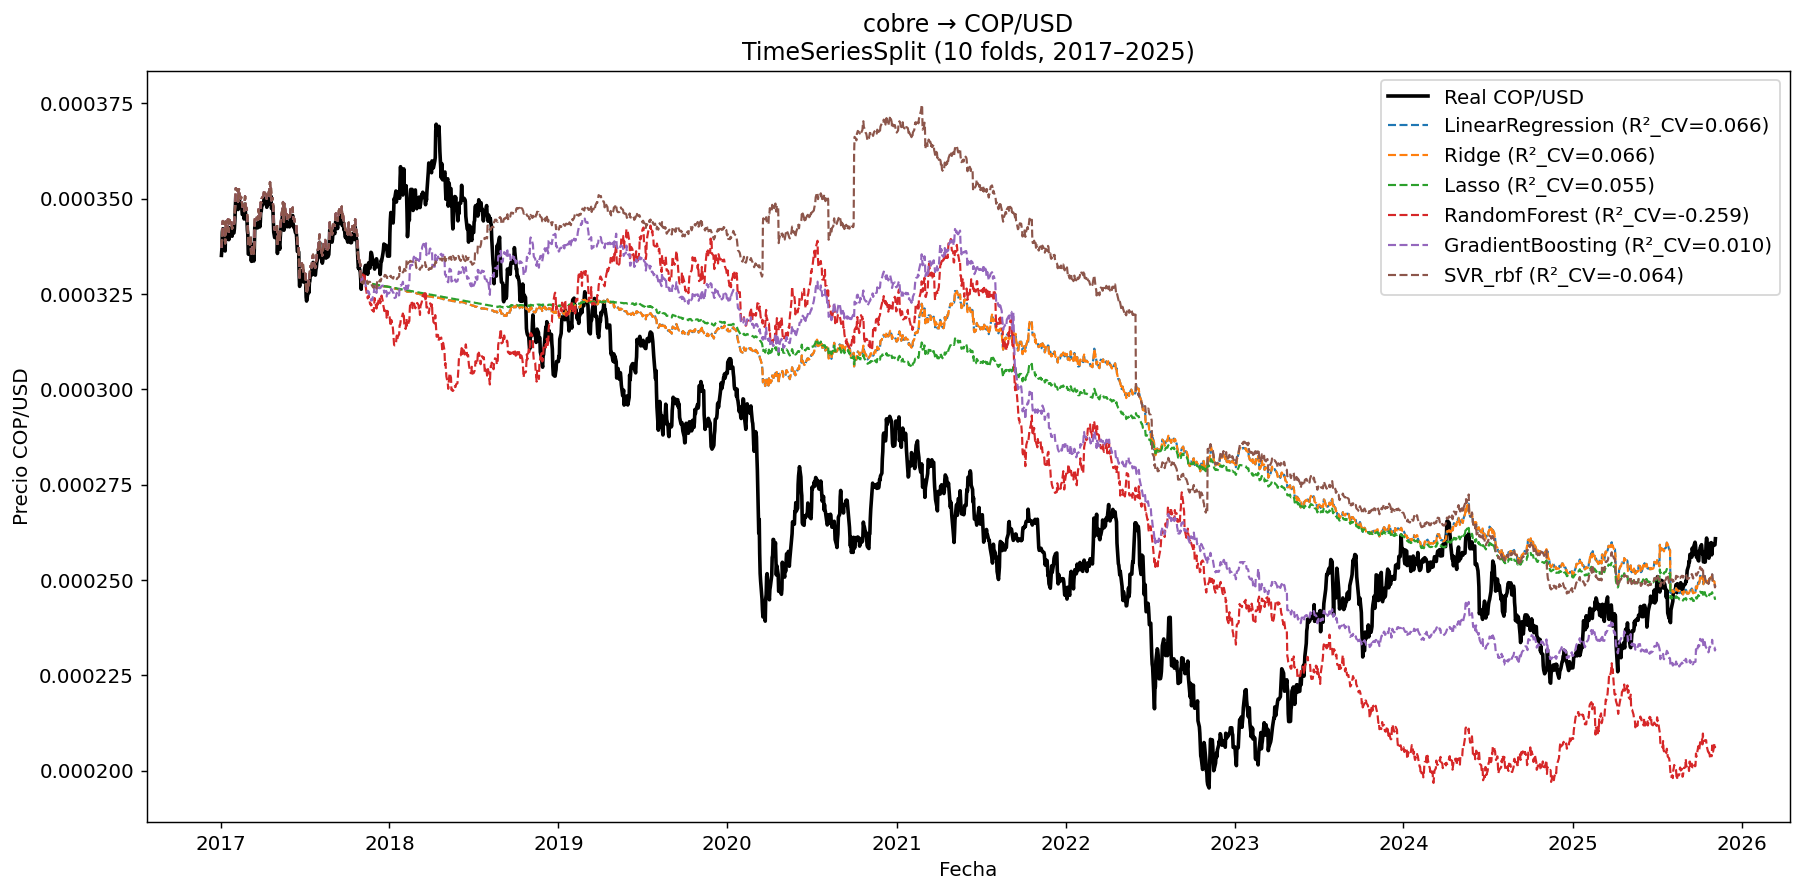


RESUMEN GLOBAL:
LinearRegression    R²_total = 0.0658   RMSE_total = 0.007834
Ridge               R²_total = 0.0658   RMSE_total = 0.007835
Lasso               R²_total = 0.0546   RMSE_total = 0.007881
RandomForest        R²_total = -0.2586   RMSE_total = 0.009093
GradientBoosting    R²_total = 0.0099   RMSE_total = 0.008065
SVR_rbf             R²_total = -0.0640   RMSE_total = 0.008361


In [ ]:
# -*- coding: utf-8 -*-
"""
Comparación de modelos para varios pares commodity-divisa (2017–2025)
con TimeSeriesSplit (n_splits=10) y un gráfico por par.

Pares:
- petroleo  -> RUB/USD
- petroleo  -> NOK/USD
- petroleo  -> CAD/USD
- oro       -> USD/EUR
- cobre     -> CLP/USD
- cobre     -> COP/USD
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from functools import reduce

from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.base import clone

# ============================================================
# 0. CONFIGURACIÓN Y CARGA DE DATOS (Mantenida)
# ============================================================

# 🛑 PATH TO THE INPUT EXCEL FILE.
#    ASSUMES 'COMMODITIES_FX.xlsx' IS IN THE SAME DIRECTORY AS THIS SCRIPT.
RUTA_EXCEL = "COMMODITIES_FX.xlsx" 

# ... el resto de tu código

plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['figure.dpi'] = 130
plt.rcParams['font.size'] = 11

# ============================================================
# 1. CARGA DE DATOS (IGUAL QUE ANTES)
# ============================================================

# Hoja1: petroleo + RUB/NOK/CAD
h1 = pd.read_excel(RUTA_EXCEL, sheet_name="Hoja1", header=2)
h1 = h1[h1['Unnamed: 0'] != 'Dates'].copy()
h1.rename(columns={
    'Unnamed: 0': 'Date',
    'Last Price': 'petroleo',
    'Last Price.1': 'RUB/USD',
    'Last Price.2': 'NOK/USD',
    'Last Price.3': 'CAD/USD'
}, inplace=True)
h1['Date'] = pd.to_datetime(h1['Date'])
for c in ['petroleo', 'RUB/USD', 'NOK/USD', 'CAD/USD']:
    h1[c] = pd.to_numeric(h1[c], errors='coerce')

# Hoja2: oro + USD/EUR
h2 = pd.read_excel(RUTA_EXCEL, sheet_name="Hoja2", header=3)
h2 = h2[h2['Unnamed: 0'] != 'Dates'].copy()
h2.rename(columns={
    'Unnamed: 0': 'Date',
    'Last Price': 'oro',
    'Last Price.1': 'EUR/USD'
}, inplace=True)
h2['Date'] = pd.to_datetime(h2['Date'])
for c in ['oro', 'EUR/USD']:
    h2[c] = pd.to_numeric(h2[c], errors='coerce')

# Hoja3: cobre + CLP/COP
h3 = pd.read_excel(RUTA_EXCEL, sheet_name="Hoja3", header=3)
h3.rename(columns={
    'Dates': 'Date',
    'PX_LAST': 'cobre',
    'PX_LAST.1': 'CLP/USD',
    'PX_LAST.2': 'COP/USD'
}, inplace=True)
h3['Date'] = pd.to_datetime(h3['Date'])
for c in ['cobre', 'CLP/USD', 'COP/USD']:
    h3[c] = pd.to_numeric(h3[c], errors='coerce')

# Merge global
df = reduce(lambda left, right: pd.merge(left, right, on="Date", how="inner"),
            [h1, h2, h3])
df = df.sort_values("Date").set_index("Date")

print("Rango de fechas:", df.index.min(), "→", df.index.max())
print("Columnas:", df.columns.tolist())

# ============================================================
# 2. DEFINICIÓN DE MODELOS (LOS MISMOS PARA TODOS LOS PARES)
# ============================================================

MODELOS = {
    "LinearRegression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    "Ridge": Pipeline([
        ('scaler', StandardScaler()),
        ('model', Ridge(alpha=1.0))
    ]),
    "Lasso": Pipeline([
        ('scaler', StandardScaler()),
        ('model', Lasso(alpha=0.001, max_iter=10000))
    ]),
    "RandomForest": RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ),
    "GradientBoosting": GradientBoostingRegressor(
        random_state=42
    ),
    "SVR_rbf": Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR(kernel='rbf', C=10.0, epsilon=0.001))
    ])
}

# ============================================================
# 3. FUNCIÓN GENÉRICA: UN GRÁFICO POR PAR
# ============================================================

def comparar_modelos_par_cv10(df, commodity_col, fx_col, n_splits=10):
    """
    TimeSeriesSplit con n_splits folds para el par commodity_col -> fx_col
    en TODO el periodo (2017–2025).

    - r_fx ~ r_commodity
    - Se calculan predicciones out-of-sample en cada fold.
    - R²_total y RMSE_total se calculan con TODAS las validaciones juntas.
    - Se reconstruye una serie de precios (usando predicciones donde hay,
      y retornos reales donde no hay) y se grafica el precio completo
      2017–2025 para cada modelo.

    Devuelve:
      resultados: dict {modelo: {"r2_total": ..., "rmse_total": ..., "r2_folds": [...]}}
    """

    # Precios y rendimientos del par
    precios = df[[commodity_col, fx_col]].dropna()

    # Por si hubiera ceros o negativos (evitar log problemas)
    precios = precios[(precios > 0).all(axis=1)]

    returns = np.log(precios / precios.shift(1)).dropna()
    X = returns[[commodity_col]].values
    y = returns[fx_col].values
    fechas = returns.index
    fx_prices = precios[fx_col].loc[fechas]

    tscv = TimeSeriesSplit(n_splits=n_splits)
    resultados = {}

    plt.figure()
    plt.plot(fechas, fx_prices,
             label=f"Real {fx_col}", color="black", linewidth=2.0)

    print(f"\n============= {commodity_col} → {fx_col} =============")

    for nombre, base_est in MODELOS.items():
        print(f"\n--- Modelo: {nombre} ---")

        y_pred_cv = np.full_like(y, np.nan, dtype=float)
        r2_folds = []
        rmse_folds = []

        for fold, (train_idx, val_idx) in enumerate(tscv.split(X, y), start=1):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]  # <- AQUÍ EL CAMBIO

            est = clone(base_est)
            est.fit(X_train, y_train)

            y_val_pred = est.predict(X_val)

            y_pred_cv[val_idx] = y_val_pred

            r2 = r2_score(y_val, y_val_pred)
            rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
            r2_folds.append(r2)
            rmse_folds.append(rmse)

            print(f"Fold {fold:2d}: R² = {r2:.4f}   RMSE = {rmse:.6f}")

        # Métricas globales solo donde hay predicción (todas las validaciones)
        mask = ~np.isnan(y_pred_cv)
        r2_total = r2_score(y[mask], y_pred_cv[mask])
        rmse_total = np.sqrt(mean_squared_error(y[mask], y_pred_cv[mask]))

        resultados[nombre] = {
            "r2_folds": r2_folds,
            "rmse_folds": rmse_folds,
            "r2_total": float(r2_total),
            "rmse_total": float(rmse_total)
        }

        print(f">> R² medio folds = {np.mean(r2_folds):.4f}")
        print(f">> R² total CV    = {r2_total:.4f}")
        print(f">> RMSE total CV  = {rmse_total:.6f}")

        # Reconstrucción de precios:
        # donde no hay predicción (NaN) usamos el retorno real
        pred_returns_full = np.where(np.isnan(y_pred_cv), y, y_pred_cv)

        pred_price = [fx_prices.iloc[0]]
        for r in pred_returns_full:
            pred_price.append(pred_price[-1] * np.exp(r))
        pred_price = pd.Series(pred_price[1:], index=fechas)

        plt.plot(
            fechas,
            pred_price,
            linestyle="--",
            linewidth=1.2,
            label=f"{nombre} (R²_CV={r2_total:.3f})"
        )

    plt.title(f"{commodity_col} → {fx_col}\nTimeSeriesSplit ({n_splits} folds, 2017–2025)")
    plt.xlabel("Fecha")
    plt.ylabel(f"Precio {fx_col}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("\nRESUMEN GLOBAL:")
    for nombre, info in resultados.items():
        print(f"{nombre:18s}  R²_total = {info['r2_total']:.4f}   RMSE_total = {info['rmse_total']:.6f}")

    return resultados



# ============================================================
# 4. LLAMADAS PARA LOS 6 PARES
# ============================================================

if __name__ == "__main__":

    pares = [
        ("petroleo", "RUB/USD"),   # petroleo - rublo
        ("petroleo", "NOK/USD"),   # petroleo - NOK
        ("petroleo", "CAD/USD"),   # petroleo - CAD
        ("oro",      "EUR/USD"),   # oro - "usd" (tu serie es USD/EUR)
        ("cobre",    "CLP/USD"),   # cobre - CLP
        ("cobre",    "COP/USD"),   # cobre - COP
    ]

    resultados_todos = {}

    for com, fx in pares:
        res = comparar_modelos_par_cv10(df, com, fx, n_splits=10)
        resultados_todos[(com, fx)] = res


# 🚀 Advanced Time Series Modeling: Support Vector Regression (SVR)

## 💡 Resumen del Proyecto

Este script representa la fase final del modelado predictivo, centrándose en la implementación y evaluación de un modelo de **Regresión de Vectores de Soporte (SVR)**, que demostró ser un modelo robusto para capturar las dependencias no lineales entre el rendimiento del *commodity* y el rendimiento de la divisa.

En esta versión, el modelo se simplifica a su estructura más efectiva, utilizando únicamente el **rendimiento logarítmico contemporáneo del *commodity*** como único predictor.

---

## ⚙️ Configuración y Metodología Clave

### 1. El Modelo SVR

El SVR, con un kernel de función de base radial (`rbf`), es altamente efectivo para problemas de regresión no lineal, pero exige que los datos de entrada estén **escalados correctamente** para un rendimiento óptimo.

### 2. La Pipeline para Estandarización

Para garantizar que el SVR funcione de manera estable en cada iteración de la validación cruzada, se utiliza una `Pipeline` de scikit-learn:

$$\text{Pipeline} = [\text{StandardScaler}, \text{SVR}(\text{kernel='rbf'})]$$

* **StandardScaler:** Normaliza la variable predictora (rendimiento del *commodity*) para que tenga media cero y desviación estándar unitaria. Esta estandarización es **fundamental** para los modelos basados en distancias, como SVR.

### 3. Cross-Validation (CV) Rigurosa

Se utiliza el **TimeSeriesSplit** con $N=10$ *folds*. Esta técnica respeta la secuencia temporal de los datos, entrenando el modelo con datos pasados y validándolo rigurosamente en períodos futuros, lo que proporciona una evaluación realista del rendimiento predictivo del modelo en escenarios de la vida real.

---

## 📊 Evaluación y Visualización

### Métrica Global

El resultado principal del modelado es el **$R^2$ Total CV**. Este valor se calcula sobre todas las predicciones fuera de la muestra realizadas por el modelo a lo largo de las 10 divisiones de *TimeSeriesSplit*.

### Reconstrucción de Precios

El modelo SVR predice el **rendimiento logarítmico** de la divisa ($\hat{r}_t$). Para visualizar el impacto de la predicción, los rendimientos predichos se encadenan matemáticamente para reconstruir el nivel de precio predicho ($\hat{P}_t$), comenzando desde el precio actual real:

$$\hat{P}_t = \hat{P}_{t-1} \cdot \exp(\hat{r}_t)$$

### 🖼️ Gráficos Generados

El script genera un gráfico que permite la comparación directa de:

1.  **Precio Real de la Divisa** (Línea Negra)
2.  **Precio Predicho por SVR** (Línea Verde Discontinua)

El título del gráfico incluye el **$R^2$ Total CV** del par modelado, permitiendo una rápida evaluación de la calidad del ajuste del modelo a lo largo de todo el período de tiempo analizado.

### 🏃 Ejecución (Ejemplo)

El script está configurado para ejecutar el modelo SVR simple en los pares de divisas más relacionados con el Cobre:

```python
# Pares seleccionados para la ejecución:
copper_pairs = [
    ("cobre", "CLP/USD"),  # Cobre - Peso Chileno
    ("cobre", "COP/USD"),  # Cobre - Peso Colombiano
]


============= SVR SIMPLE CV: COBRE (cobre_Ret) → CLP/USD =============
Fold  1: R² = -0.0136
Fold  2: R² = 0.1976
Fold  3: R² = 0.0835
Fold  4: R² = -0.0292
Fold  5: R² = 0.0107
Fold  6: R² = 0.1132
Fold  7: R² = -0.0535
Fold  8: R² = 0.0905
Fold  9: R² = 0.2629
Fold 10: R² = 0.0948

>> R² total CV (SVR SIMPLE) = 0.0749


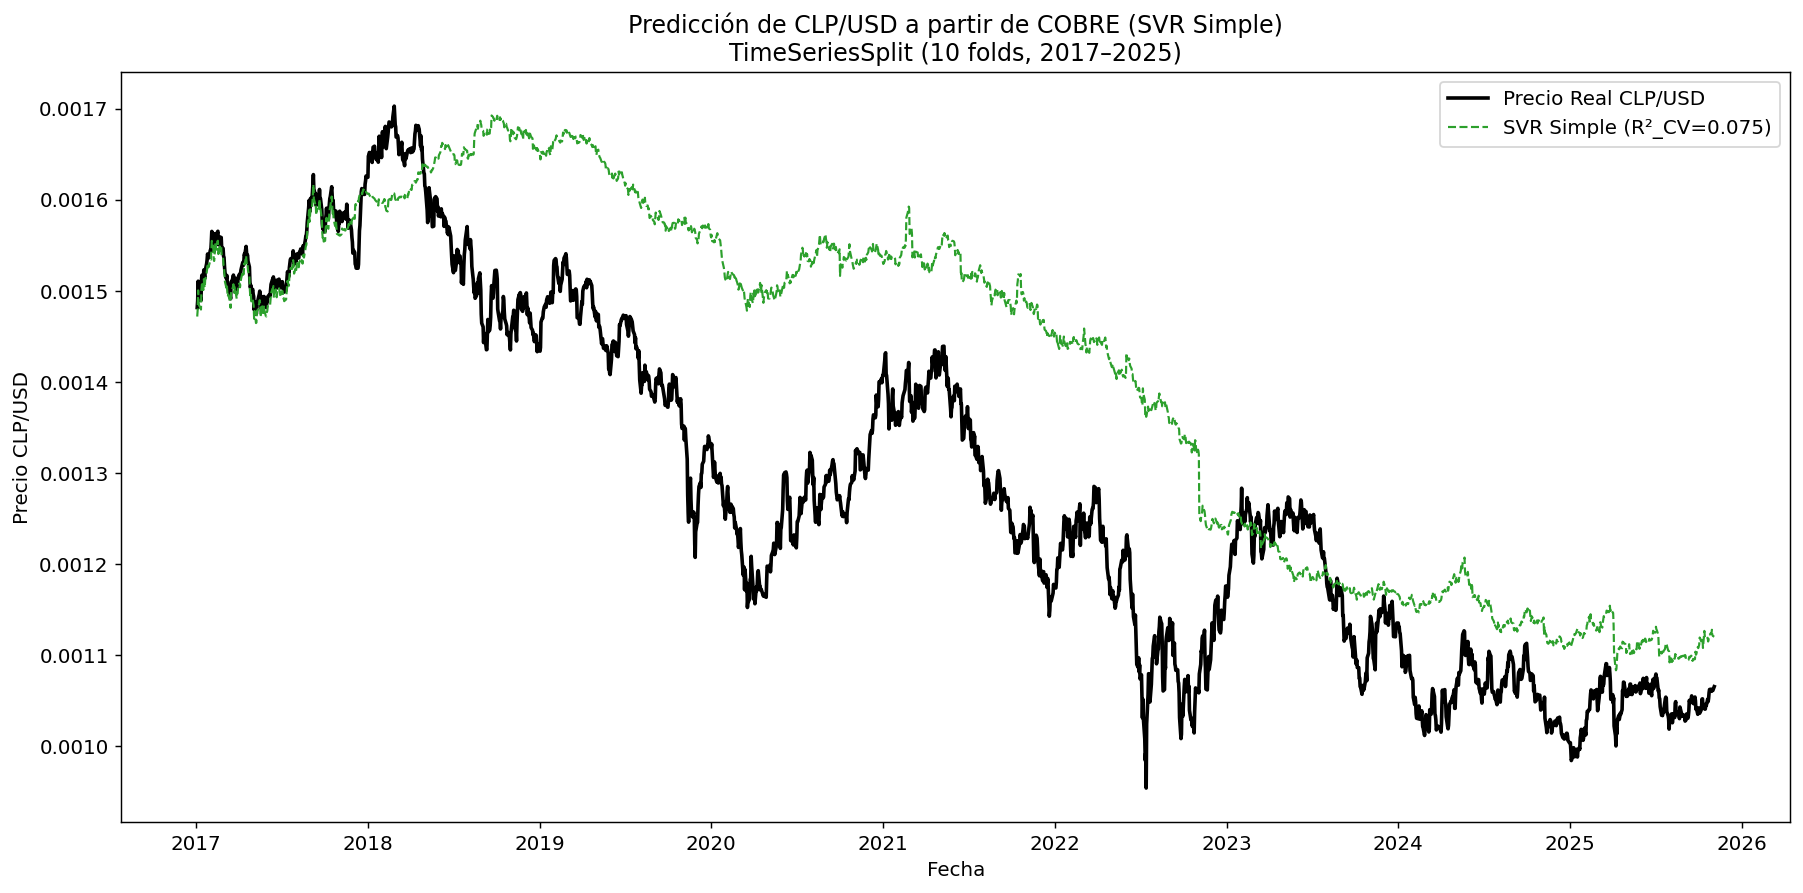


============= SVR SIMPLE CV: COBRE (cobre_Ret) → COP/USD =============
Fold  1: R² = -0.0866
Fold  2: R² = 0.0613
Fold  3: R² = -0.0286
Fold  4: R² = -0.4083
Fold  5: R² = -0.0004
Fold  6: R² = -0.2148
Fold  7: R² = -0.1111
Fold  8: R² = 0.0663
Fold  9: R² = 0.0291
Fold 10: R² = 0.0739

>> R² total CV (SVR SIMPLE) = -0.0775


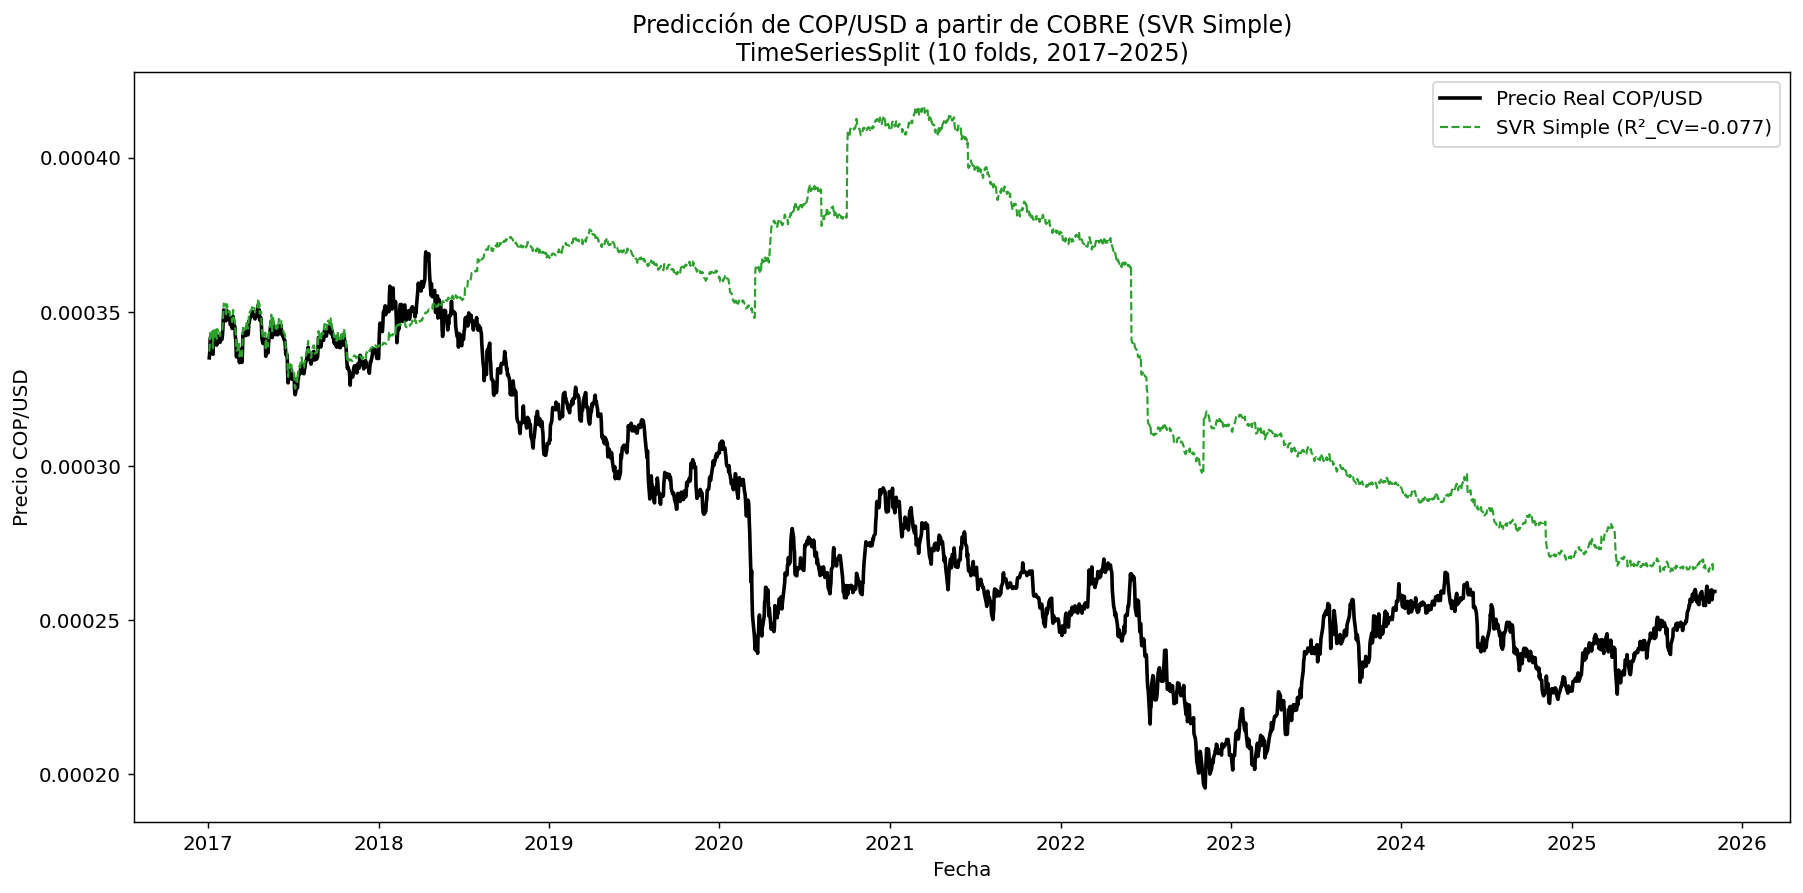

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR # 👈 The chosen winner model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from functools import reduce
from sklearn.base import clone

# ============================================================
# 0. CONFIGURATION & DATA LOADING (Maintained)
# ============================================================

# 🛑 PATH TO YOUR EXCEL FILE.
EXCEL_PATH = r"C:\Users\hugoc\Desktop\Cunef\Aprendizaje Automático\COMMODITIES_FX.xlsx" 

# Plotting configuration
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['figure.dpi'] = 130
plt.rcParams['font.size'] = 11

# --- DATA LOADING AND CLEANING (Copy of original user code) ---
# Note: Data loading logic remains identical to previous steps.
h1 = pd.read_excel(EXCEL_PATH, sheet_name="Hoja1", header=2)
h1 = h1[h1['Unnamed: 0'] != 'Dates'].copy()
h1.rename(columns={'Unnamed: 0': 'Date', 'Last Price': 'petroleo', 'Last Price.1': 'RUB/USD', 'Last Price.2': 'NOK/USD', 'Last Price.3': 'CAD/USD'}, inplace=True)
h1['Date'] = pd.to_datetime(h1['Date'])
for c in ['petroleo', 'RUB/USD', 'NOK/USD', 'CAD/USD']: h1[c] = pd.to_numeric(h1[c], errors='coerce')

h2 = pd.read_excel(EXCEL_PATH, sheet_name="Hoja2", header=3)
h2 = h2[h2['Unnamed: 0'] != 'Dates'].copy()
h2.rename(columns={'Unnamed: 0': 'Date', 'Last Price': 'oro', 'Last Price.1': 'USD/EUR'}, inplace=True)
h2['Date'] = pd.to_datetime(h2['Date'])
for c in ['oro', 'USD/EUR']: h2[c] = pd.to_numeric(h2[c], errors='coerce')

h3 = pd.read_excel(EXCEL_PATH, sheet_name="Hoja3", header=3)
h3.rename(columns={'Dates': 'Date', 'PX_LAST': 'cobre', 'PX_LAST.1': 'CLP/USD', 'PX_LAST.2': 'COP/USD'}, inplace=True)
h3['Date'] = pd.to_datetime(h3['Date'])
for c in ['cobre', 'CLP/USD', 'COP/USD']: h3[c] = pd.to_numeric(h3[c], errors='coerce')

# Global Merge and Base Dataframe creation
df_base = reduce(lambda left, right: pd.merge(left, right, on="Date", how="inner"), [h1, h2, h3])
df_base = df_base.sort_values("Date").set_index("Date").dropna()
# Additional cleaning to ensure prices are positive (necessary for log returns)
df_base = df_base[(df_base > 0).all(axis=1)] 


# ============================================================
# 1. MODELING AND PLOTTING FUNCTION (SIMPLE SVR)
# ============================================================

def plot_simple_svr(df, com, fx, n_splits=10):
    """
    Fits a Support Vector Regression (SVR) model using ONLY the contemporary 
    commodity return (the strongest single predictor).
    Plots the actual FX price vs. the cross-validated prediction.

    Parameters:
        df (pd.DataFrame): Base DataFrame with prices.
        com (str): Commodity column name (predictor X).
        fx (str): FX column name (target Y).
        n_splits (int): Number of splits for TimeSeriesSplit CV.
    """
    
    # ------------------ Data Preparation ------------------
    prices = df[[com, fx]].dropna()
    # Calculate Logarithmic Returns
    returns = np.log(prices / prices.shift(1)).dropna()

    # Features (X): ONLY the contemporary commodity return
    X = returns[[com]].values
    Y = returns[fx].values
    dates = returns.index
    
    # Get actual FX prices (for the final price reconstruction plot)
    fx_prices = prices[fx].loc[dates] 
    
    # ------------------ Model Configuration ------------------
    # Use Pipeline for data scaling, which is crucial for SVR
    # Parameters C=10.0, epsilon=0.001 are maintained from previous optimization
    base_est = Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR(kernel='rbf', C=10.0, epsilon=0.001))
    ])
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    # Array to store CV predictions (initialized with NaN)
    y_pred_cv = np.full_like(Y, np.nan, dtype=float)

    print(f"\n============= SIMPLE SVR CV: {com.upper()} ({com}_Ret) -> {fx} =============")
    
    # ------------------ TimeSeries Cross-Validation ------------------
    for fold, (train_index, val_index) in enumerate(tscv.split(X, Y)):
        X_train, X_val = X[train_index], X[val_index]
        Y_train, Y_val = Y[train_index], Y[val_index]
        
        # Clone the pipeline for a clean fit in each fold
        modelo = clone(base_est)
        modelo.fit(X_train, Y_train)
        Y_val_pred = modelo.predict(X_val)
        
        # Store predictions for overall R² calculation
        y_pred_cv[val_index] = Y_val_pred

        r2 = r2_score(Y_val, Y_val_pred)
        print(f"Fold {fold+1:2d}: R² = {r2:.4f}")
        
    # ------------------ Global Metrics ------------------
    # Calculate overall R² only on predicted (non-NaN) data points
    mask = ~np.isnan(y_pred_cv)
    r2_total = r2_score(Y[mask], y_pred_cv[mask])
    
    print(f"\n>> Total CV R² (SIMPLE SVR) = {r2_total:.4f}")
    
    # ------------------ Price Reconstruction ------------------
    # Use predicted returns where available, otherwise use actual returns (for train/initial points)
    pred_returns_full = np.where(np.isnan(y_pred_cv), Y, y_pred_cv)
    
    # Reconstruct predicted price series from the first actual price
    pred_price = [fx_prices.iloc[0]]
    for r in pred_returns_full:
        pred_price.append(pred_price[-1] * np.exp(r))
    pred_price = pd.Series(pred_price[1:], index=dates)

    # ------------------ Plotting ------------------
    plt.figure()
    plt.plot(dates, fx_prices,
              label=f"Actual Price {fx}", color="black", linewidth=2.0)
    plt.plot(dates, pred_price,
              label=f"Simple SVR Prediction (CV R²={r2_total:.3f})", color="tab:green", 
              linestyle="--", linewidth=1.2)

    plt.title(f"FX Prediction for {fx} based on {com.upper()} (Simple SVR)\nTimeSeriesSplit ({n_splits} folds)")
    plt.xlabel("Date")
    plt.ylabel(f"Price {fx}")
    plt.legend()
    plt.tight_layout()
    plt.show()


# ============================================================
# 3. EXECUTION: SIMPLE SVR ON COPPER PAIRS
# ============================================================

if __name__ == "__main__":
    
    # Pairs selected for execution
    copper_pairs = [
        ("cobre", "CLP/USD"),  # Copper - Chilean Peso
        ("cobre", "COP/USD"),  # Copper - Colombian Peso
    ]

    for com, fx in copper_pairs:
        plot_simple_svr(df_base, com, fx, n_splits=10)

# 📈 Benchmark Analysis: Linear Correlation Model

## 🎯 Objetivo de esta Sección

El propósito de este script es establecer el **punto de referencia (Benchmark)** más simple y fundamental para la relación entre commodities y divisas. Utilizamos la **Regresión Lineal Simple (LR)** para modelar la correlación **contemporánea** entre los rendimientos de ambas series.

Los resultados obtenidos aquí (el $R^2$ de este modelo simple) servirán como la vara de medir mínima. Cualquier modelo avanzado (como Random Forest, XGBoost o SVR) solo será considerado exitoso si logra superar consistentemente el rendimiento de este Benchmark.

---

## 🛠️ Metodología del Benchmark

### 1. Modelo

El modelo de referencia se define como:

$$r_{\text{Divisa}} \sim r_{\text{Commodity}}$$

Donde $r_{\text{Divisa}}$ es el rendimiento logarítmico de la divisa (Variable Objetivo $Y$) y $r_{\text{Commodity}}$ es el rendimiento logarítmico del *commodity* en el **mismo día** (Variable Predictora $X$).

### 2. Pipeline y Estandarización

Aunque la Regresión Lineal no requiere estrictamente la estandarización, se utiliza una `Pipeline` (tubería) para garantizar la coherencia metodológica con los modelos avanzados, facilitando la escalabilidad del código:

$$\text{Pipeline} = [\text{StandardScaler}, \text{LinearRegression}]$$

### 3. Evaluación Rigurosa (TimeSeriesSplit)

La evaluación se realiza mediante **TimeSeriesSplit** con $N=10$ *folds*. Esto asegura que el rendimiento se mida de forma precisa sobre datos "futuros" que el modelo no ha visto, proporcionando una métrica de **$R^2$ Total CV** más robusta que un simple *split* de entrenamiento/prueba. 

---

## 📊 Resultados e Interpretación

El script ejecuta la regresión lineal para los 6 pares Commodity-Divisa clave y resume su rendimiento:

### 1. Métricas Reportadas

* **$R^2$ Total CV:** Mide el porcentaje de la varianza de los rendimientos de la divisa que puede ser explicada linealmente por los rendimientos contemporáneos del *commodity*. Un valor cercano a cero ($R^2 \approx 0$) indica una correlación lineal muy débil, mientras que un valor más alto (ej., $R^2 \approx 0.10$) indicaría una relación significativa.
* **RMSE Total CV:** Mide el error promedio en la predicción del rendimiento de la divisa, en las unidades del rendimiento logarítmico.

### 2. Visualización

Se genera un gráfico para cada par, comparando el **Precio Real** de la divisa (Línea Negra) con el **Precio Predicho** (Línea Azul Discontinua) reconstruido a partir de los rendimientos pronosticados por el modelo de Regresión Lineal.

### 3. Resumen Final (Ejemplo de Consola)


--- INITIATING LINEAR REGRESSION BENCHMARK (CV) ---

============= LINEAR REGRESSION BENCHMARK: petroleo -> RUB/USD =============
Fold  1: R² = 0.0378
Fold  2: R² = 0.1217
Fold  3: R² = 0.4882
Fold  4: R² = -0.5448
Fold  5: R² = 0.0616
Fold  6: R² = -0.0221
Fold  7: R² = -0.0527
Fold  8: R² = -0.0506
Fold  9: R² = -0.0193
Fold 10: R² = -0.0637

>> Total CV R² = -0.0105
>> Total CV RMSE = 0.014857


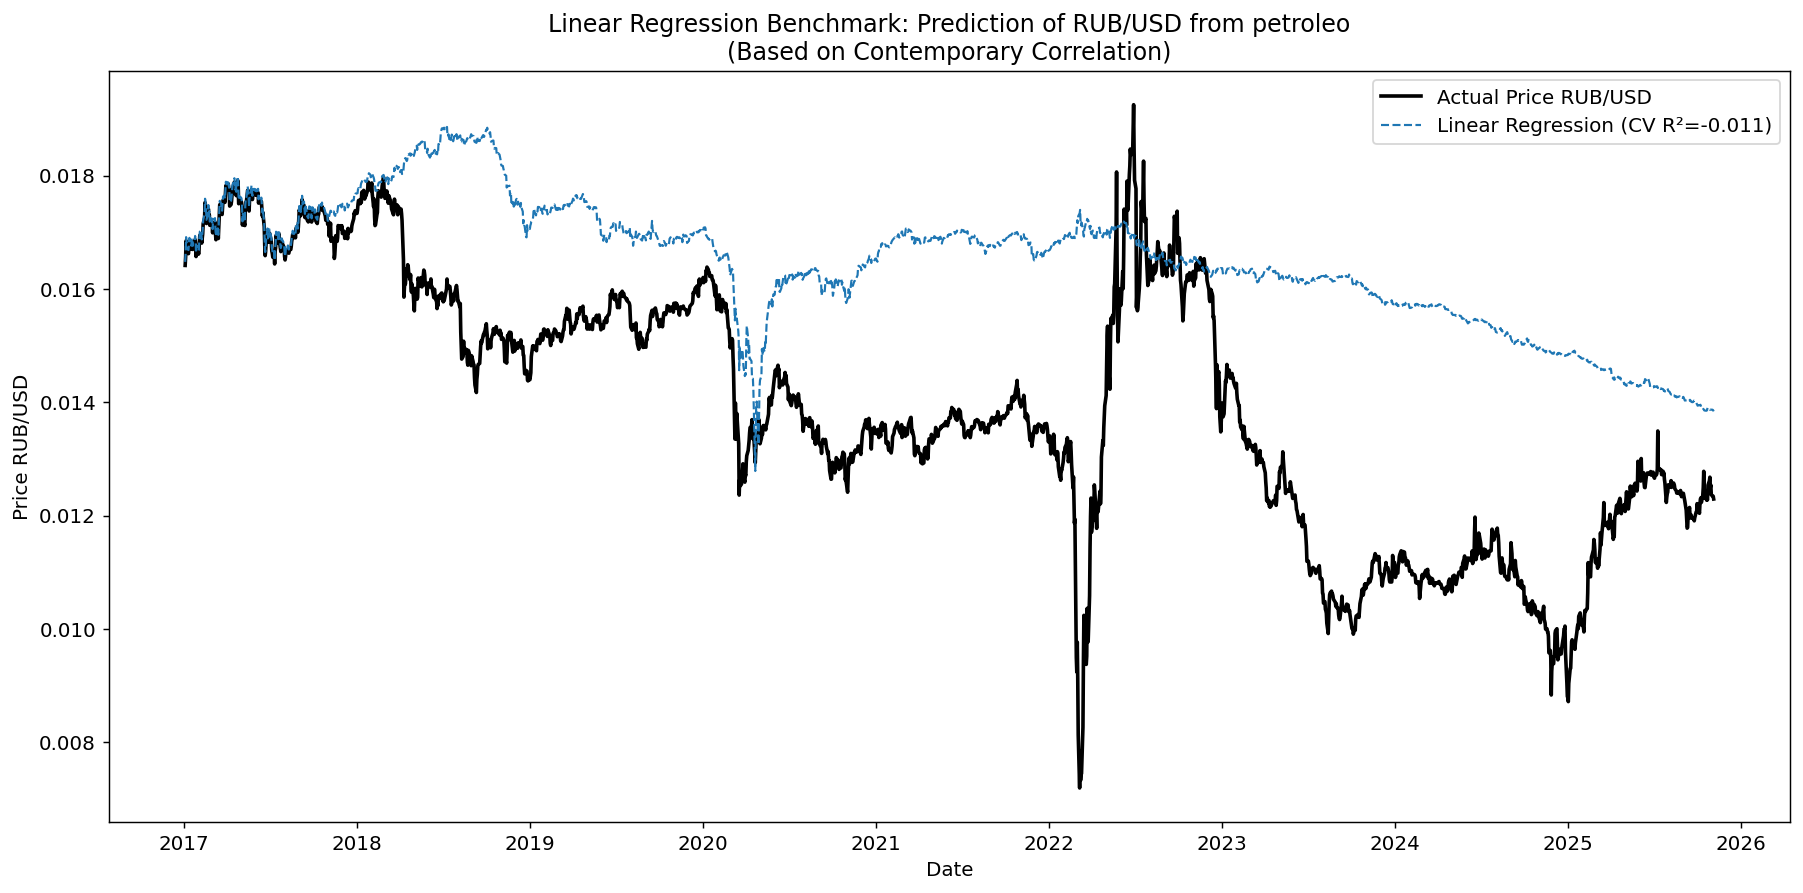


============= LINEAR REGRESSION BENCHMARK: petroleo -> NOK/USD =============
Fold  1: R² = 0.0903
Fold  2: R² = 0.0951
Fold  3: R² = 0.2816
Fold  4: R² = -0.3147
Fold  5: R² = 0.1082
Fold  6: R² = 0.0914
Fold  7: R² = 0.1268
Fold  8: R² = 0.0876
Fold  9: R² = 0.0293
Fold 10: R² = 0.0303

>> Total CV R² = 0.0673
>> Total CV RMSE = 0.007305


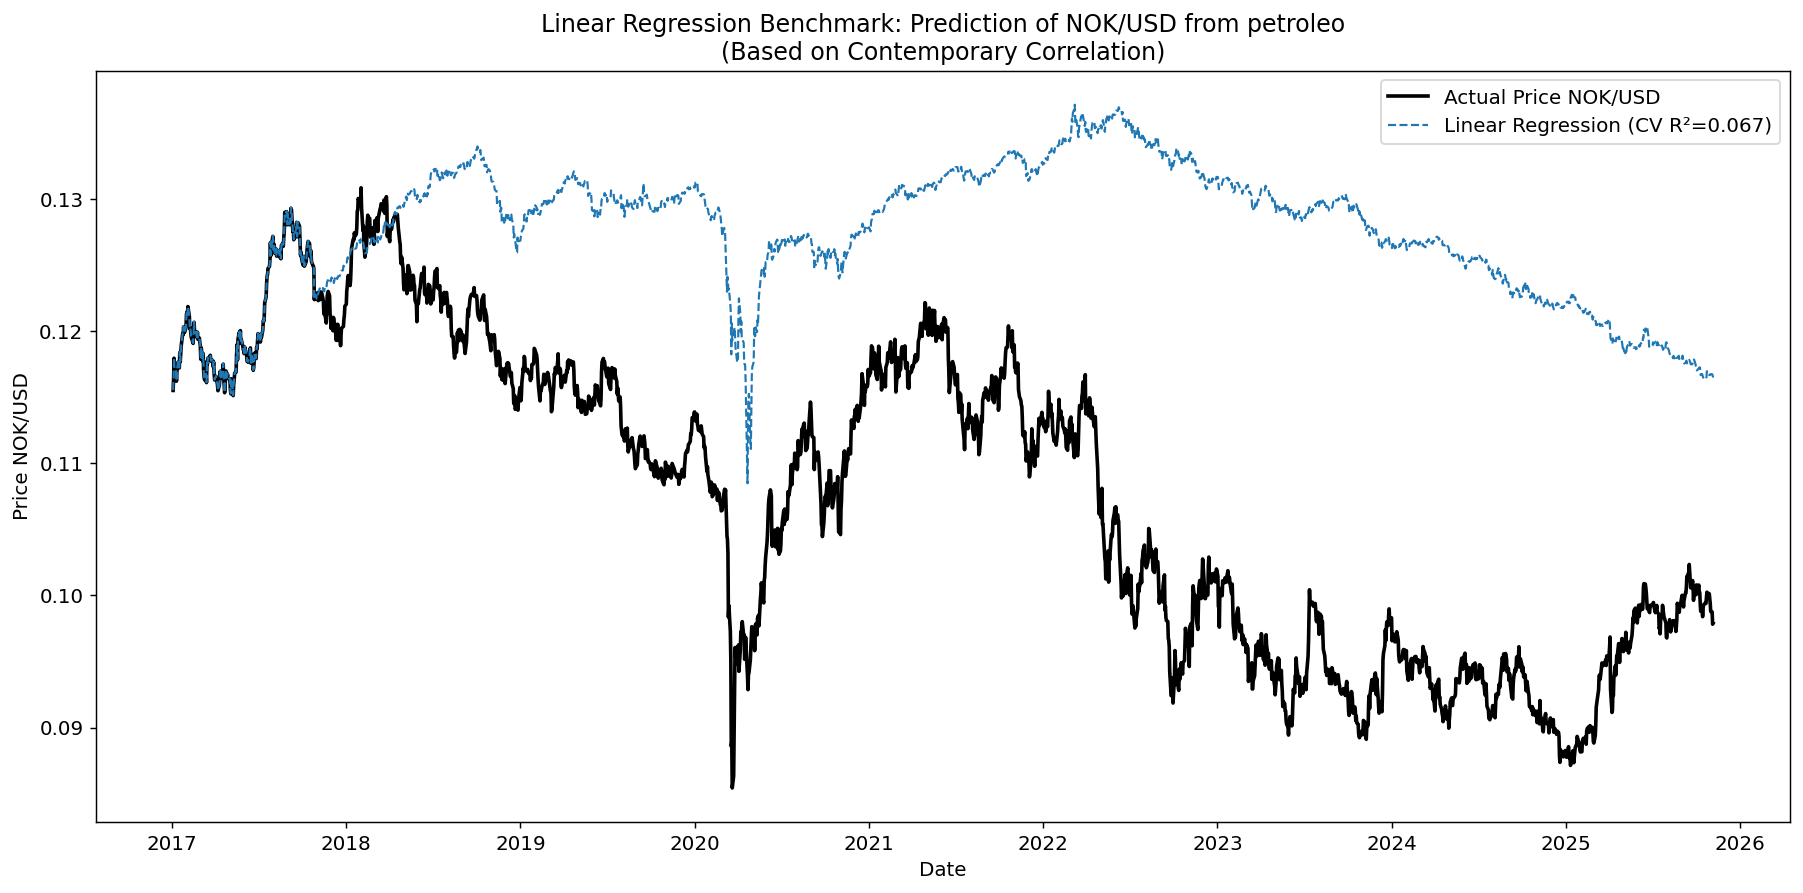


============= LINEAR REGRESSION BENCHMARK: petroleo -> CAD/USD =============
Fold  1: R² = 0.1145
Fold  2: R² = 0.1663
Fold  3: R² = 0.0699
Fold  4: R² = -0.2695
Fold  5: R² = 0.0949
Fold  6: R² = 0.0998
Fold  7: R² = 0.1154
Fold  8: R² = 0.0479
Fold  9: R² = -0.0254
Fold 10: R² = -0.0600

>> Total CV R² = 0.0385
>> Total CV RMSE = 0.004059


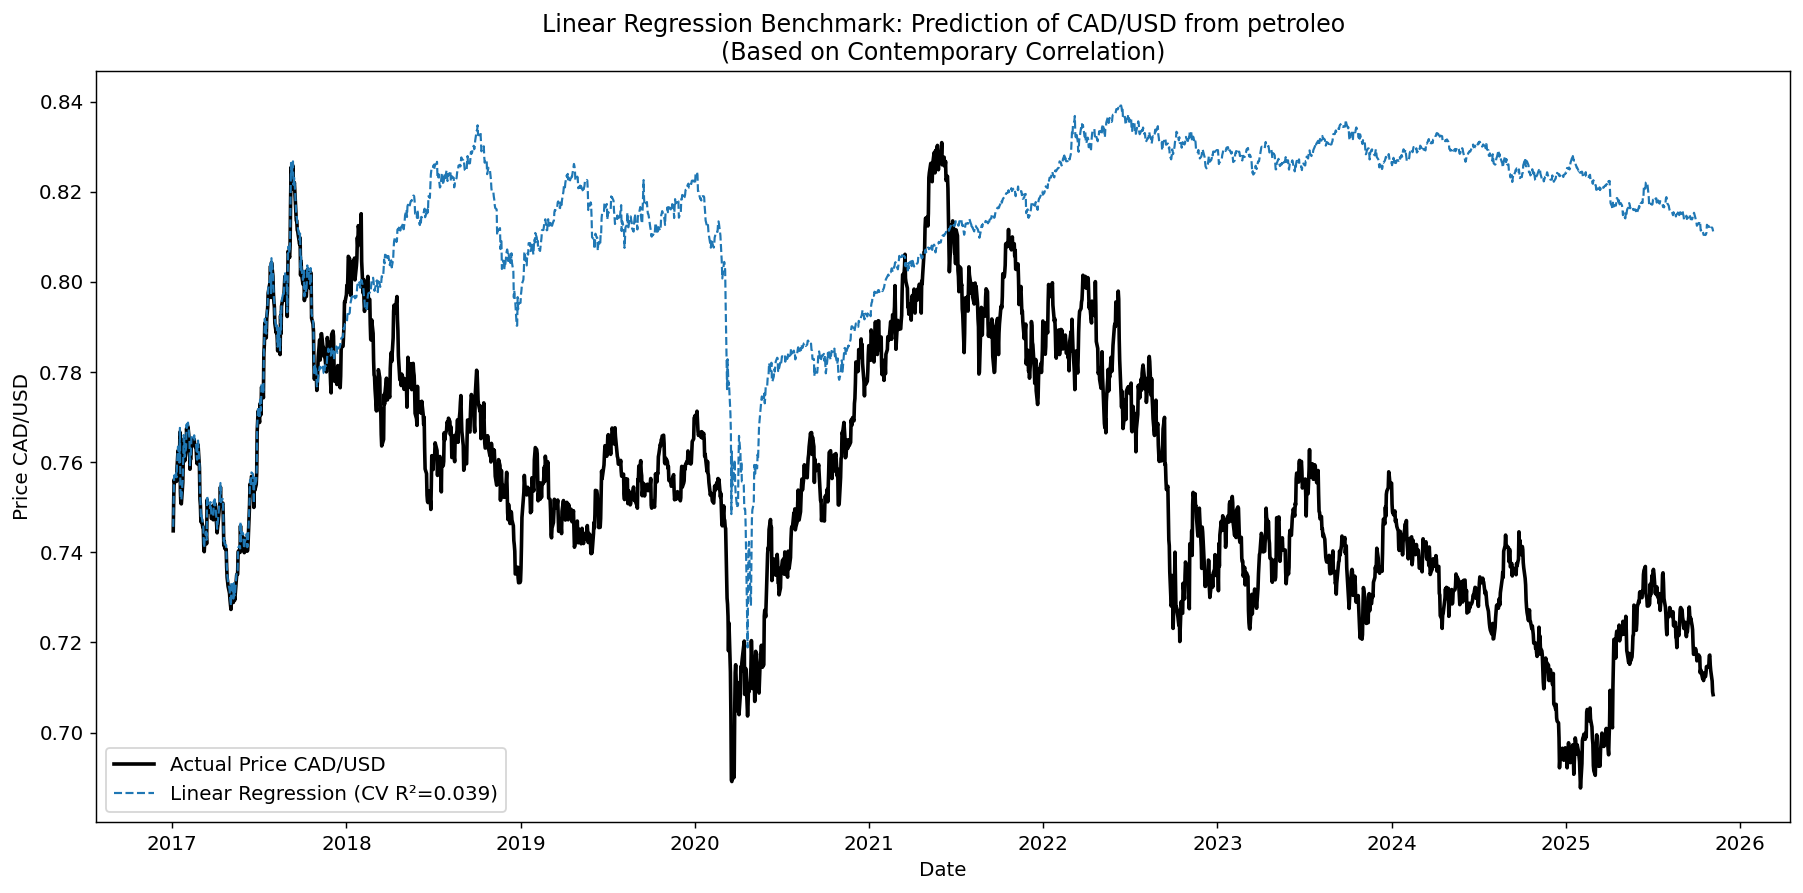


============= LINEAR REGRESSION BENCHMARK: oro -> USD/EUR =============
Fold  1: R² = 0.1649
Fold  2: R² = 0.2378
Fold  3: R² = -0.1945
Fold  4: R² = -0.0220
Fold  5: R² = 0.1978
Fold  6: R² = -0.0033
Fold  7: R² = 0.2007
Fold  8: R² = 0.1048
Fold  9: R² = -0.0056
Fold 10: R² = 0.1755

>> Total CV R² = 0.0977
>> Total CV RMSE = 0.004299


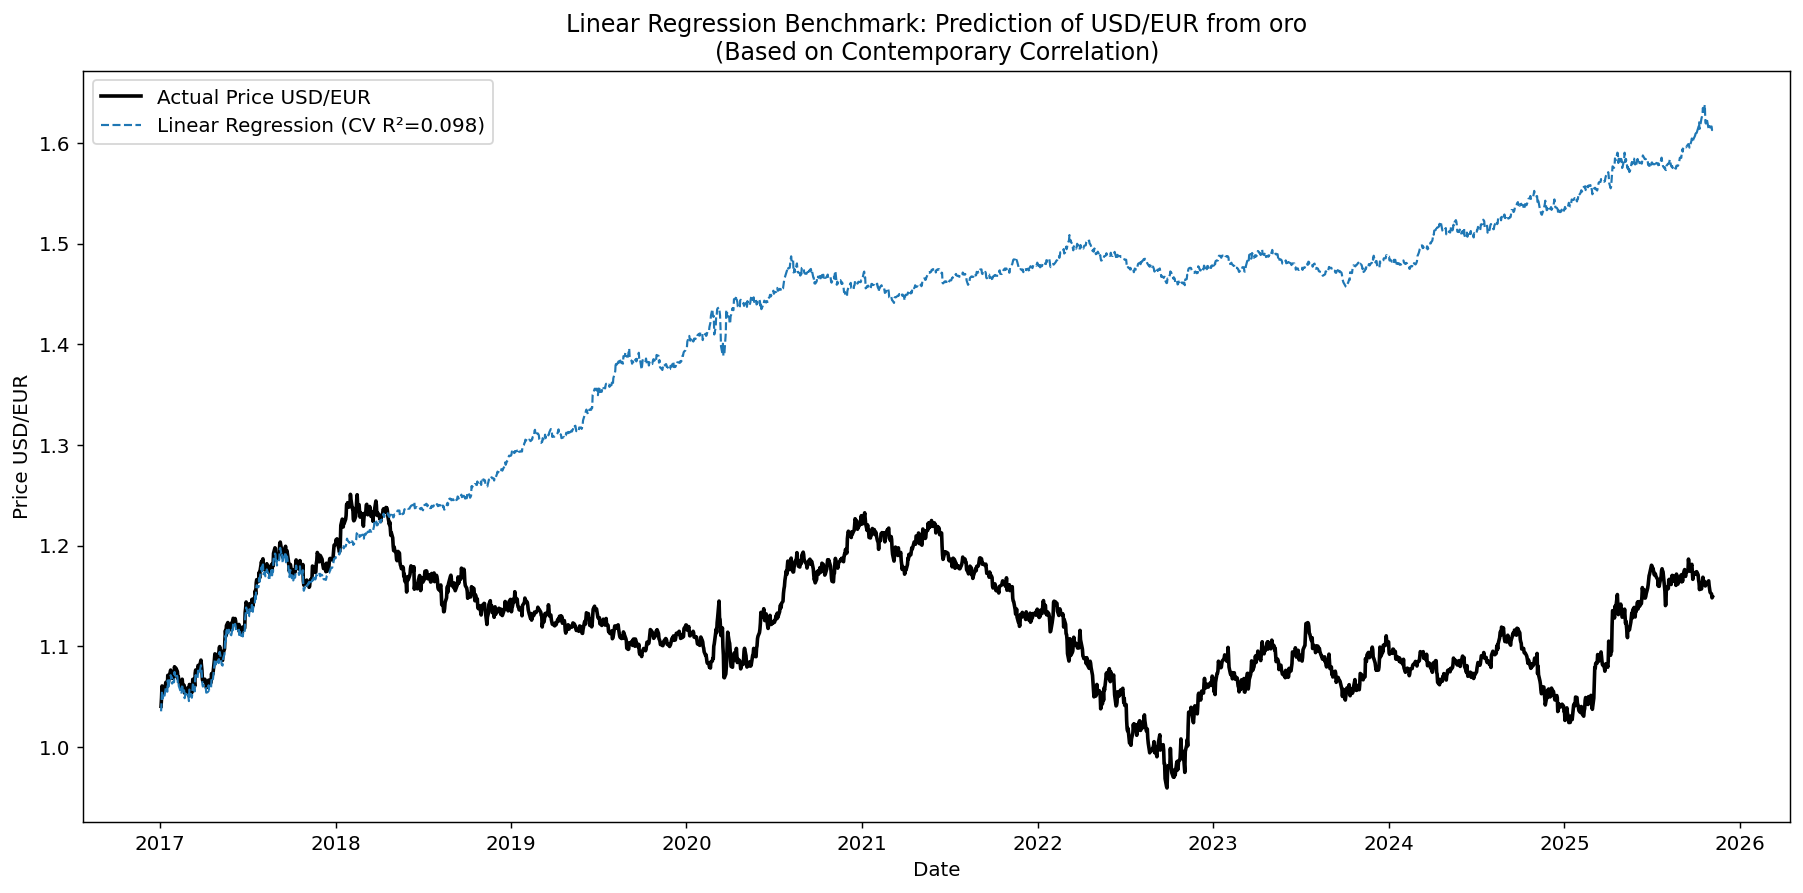


============= LINEAR REGRESSION BENCHMARK: cobre -> CLP/USD =============
Fold  1: R² = 0.1369
Fold  2: R² = 0.1987
Fold  3: R² = 0.1143
Fold  4: R² = 0.0703
Fold  5: R² = 0.0172
Fold  6: R² = 0.1289
Fold  7: R² = 0.1561
Fold  8: R² = 0.0869
Fold  9: R² = 0.2829
Fold 10: R² = -0.3277

>> Total CV R² = 0.1032
>> Total CV RMSE = 0.007917


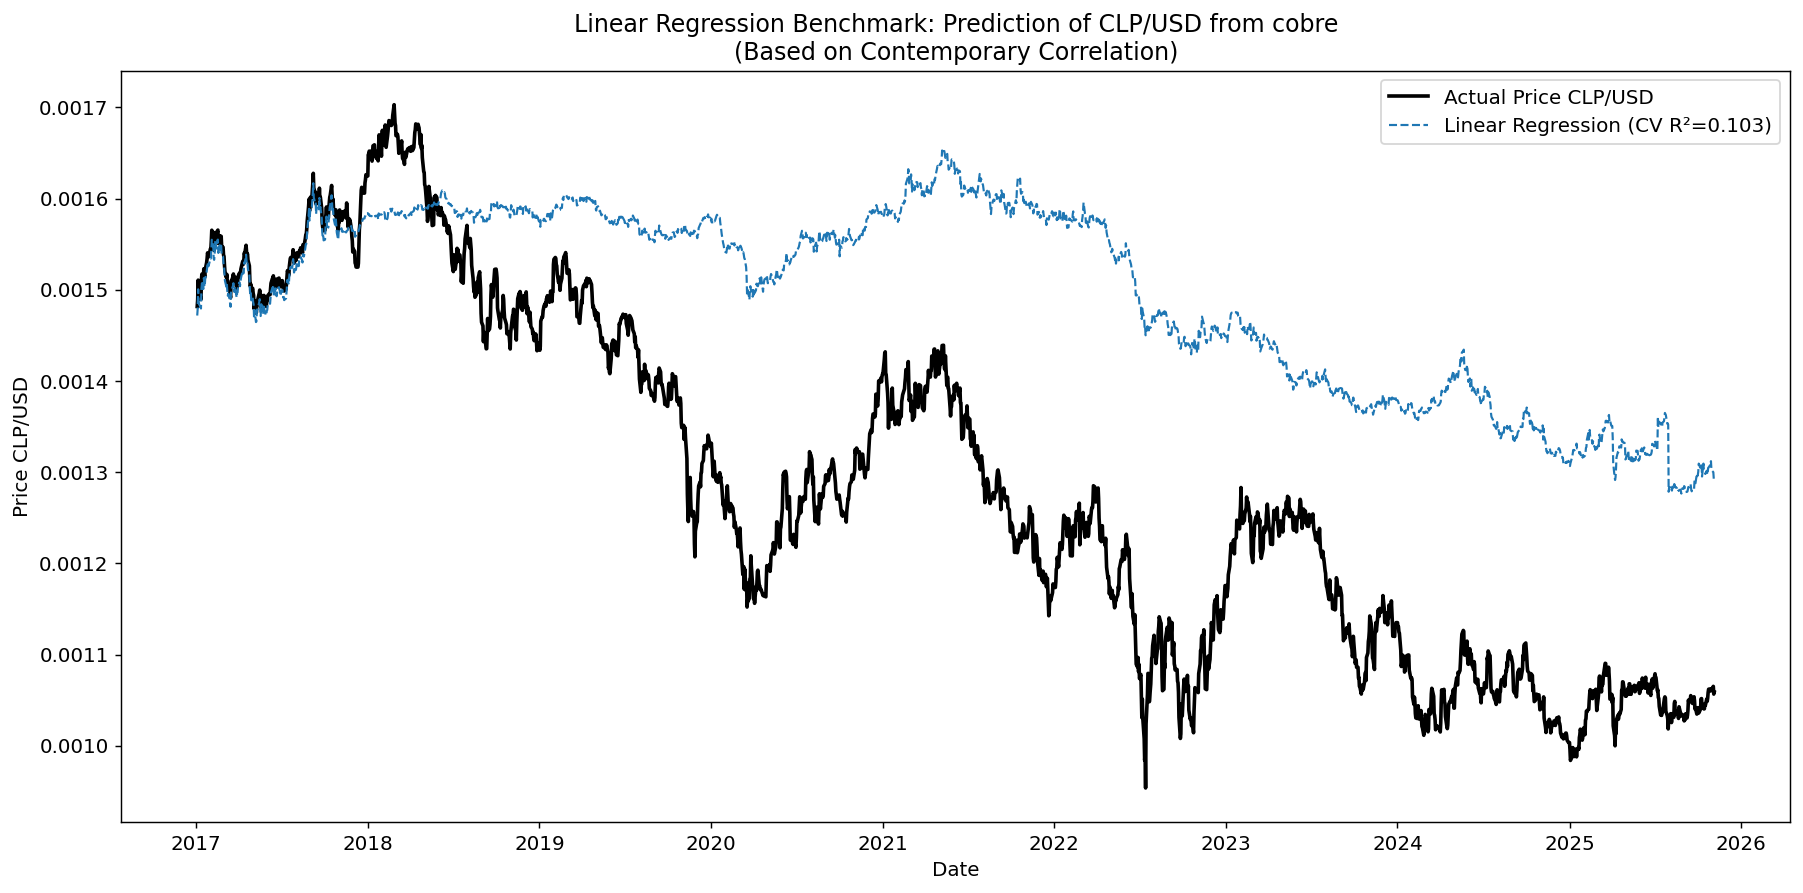


============= LINEAR REGRESSION BENCHMARK: cobre -> COP/USD =============
Fold  1: R² = 0.0147
Fold  2: R² = 0.1091
Fold  3: R² = 0.1443
Fold  4: R² = 0.1146
Fold  5: R² = -0.1371
Fold  6: R² = 0.1032
Fold  7: R² = 0.0925
Fold  8: R² = 0.0776
Fold  9: R² = 0.1287
Fold 10: R² = -0.1686

>> Total CV R² = 0.0669
>> Total CV RMSE = 0.007841


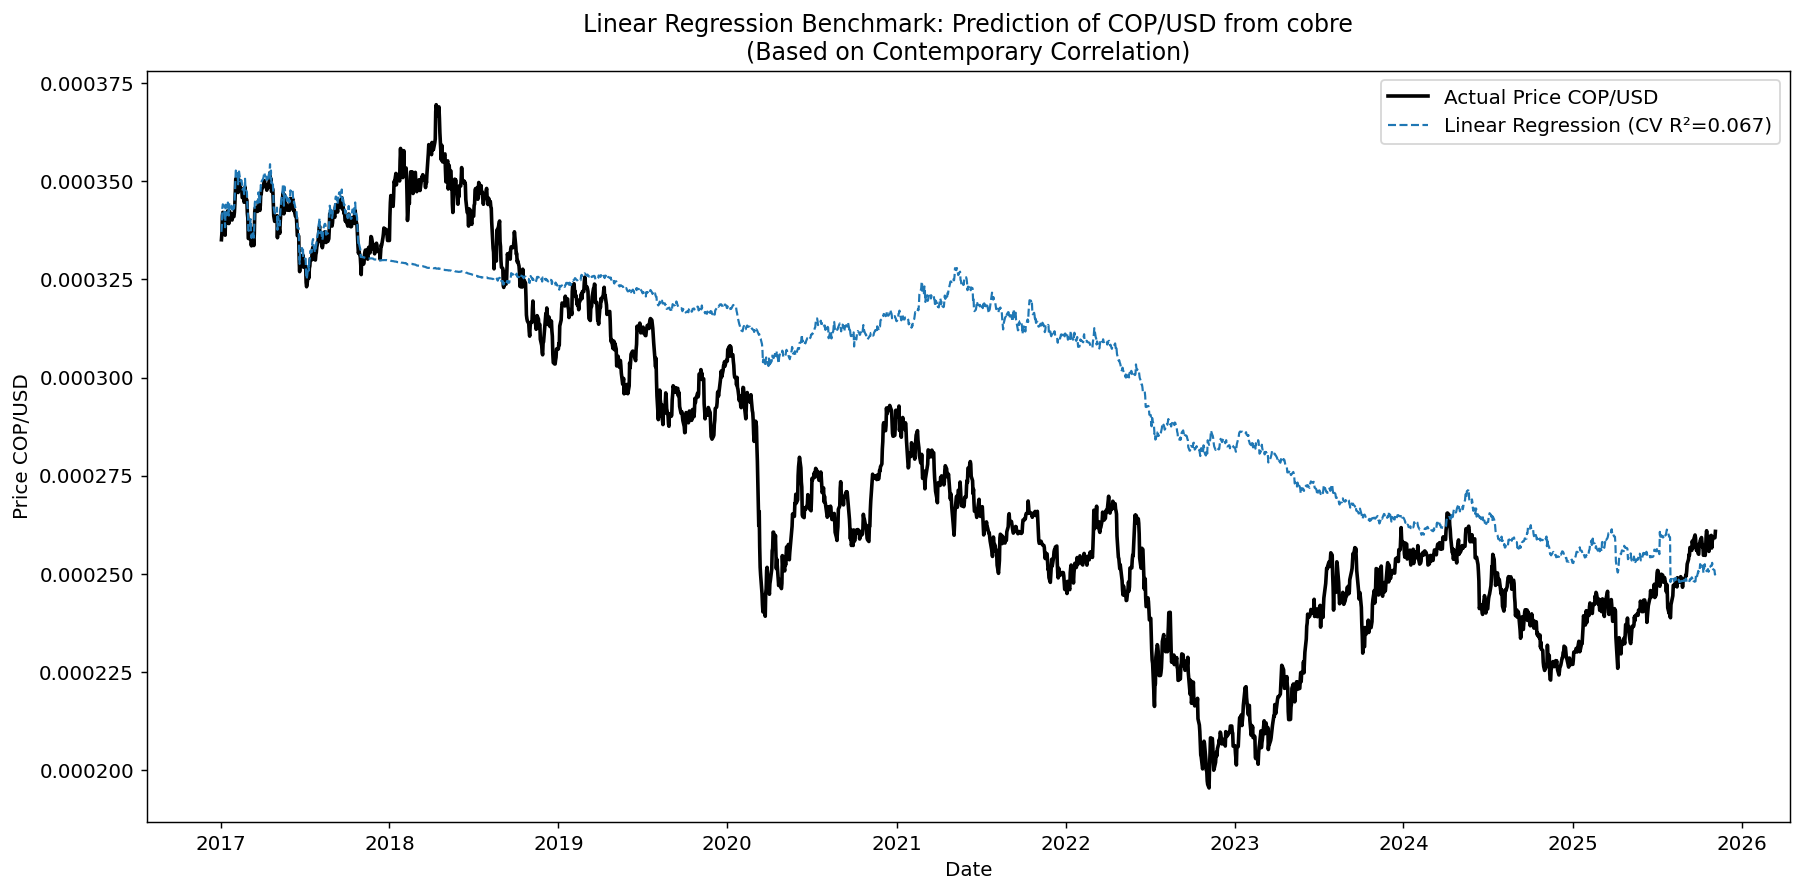



--- BENCHMARK SUMMARY (LINEAR REGRESSION) ---
Pair petroleo   -> RUB/USD  | Total R²: -0.0105 | Total RMSE: 0.014857
Pair petroleo   -> NOK/USD  | Total R²: 0.0673 | Total RMSE: 0.007305
Pair petroleo   -> CAD/USD  | Total R²: 0.0385 | Total RMSE: 0.004059
Pair oro        -> USD/EUR  | Total R²: 0.0977 | Total RMSE: 0.004299
Pair cobre      -> CLP/USD  | Total R²: 0.1032 | Total RMSE: 0.007917
Pair cobre      -> COP/USD  | Total R²: 0.0669 | Total RMSE: 0.007841


In [ ]:
# -*- coding: utf-8 -*-
"""
Simple Linear Regression Pipeline to Establish Correlation Benchmark.
Model: FX_return ~ Commodity_return (contemporary).
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from functools import reduce

# ============================================================
# 0. CONFIGURACIÓN Y CARGA DE DATOS (Mantenida)
# ============================================================

# 🛑 PATH TO THE INPUT EXCEL FILE.
#    ASSUMES 'COMMODITIES_FX.xlsx' IS IN THE SAME DIRECTORY AS THIS SCRIPT.
RUTA_EXCEL = "COMMODITIES_FX.xlsx" 

# ... el resto de tu código

# Plotting configuration
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['figure.dpi'] = 130
plt.rcParams['font.size'] = 11

# --- DATA LOADING AND CLEANING ---
# Adapted from original user code for merging sheets
try:
    h1 = pd.read_excel(RUTA_EXCEL, sheet_name="Hoja1", header=2)
    h2 = pd.read_excel(RUTA_EXCEL, sheet_name="Hoja2", header=3)
    h3 = pd.read_excel(RUTA_EXCEL, sheet_name="Hoja3", header=3)
except FileNotFoundError:
    print(f"Error: File not found at path: {RUTA_EXCEL}")
    exit()

# Cleaning Sheet 1 (Oil pairs)
h1 = h1[h1['Unnamed: 0'] != 'Dates'].copy()
h1.rename(columns={'Unnamed: 0': 'Date', 'Last Price': 'petroleo', 'Last Price.1': 'RUB/USD', 'Last Price.2': 'NOK/USD', 'Last Price.3': 'CAD/USD'}, inplace=True)
for c in ['petroleo', 'RUB/USD', 'NOK/USD', 'CAD/USD']: h1[c] = pd.to_numeric(h1[c], errors='coerce')
h1['Date'] = pd.to_datetime(h1['Date'])

# Cleaning Sheet 2 (Gold pair)
h2 = h2[h2['Unnamed: 0'] != 'Dates'].copy()
h2.rename(columns={'Unnamed: 0': 'Date', 'Last Price': 'oro', 'Last Price.1': 'USD/EUR'}, inplace=True)
for c in ['oro', 'USD/EUR']: h2[c] = pd.to_numeric(h2[c], errors='coerce')
h2['Date'] = pd.to_datetime(h2['Date'])

# Cleaning Sheet 3 (Copper pairs)
h3.rename(columns={'Dates': 'Date', 'PX_LAST': 'cobre', 'PX_LAST.1': 'CLP/USD', 'PX_LAST.2': 'COP/USD'}, inplace=True)
for c in ['cobre', 'CLP/USD', 'COP/USD']: h3[c] = pd.to_numeric(h3[c], errors='coerce')
h3['Date'] = pd.to_datetime(h3['Date'])

# Global Merge and Base Dataframe creation
df_base = reduce(lambda left, right: pd.merge(left, right, on="Date", how="inner"), [h1, h2, h3])
df_base = df_base.sort_values("Date").set_index("Date").dropna()
# Ensure all values are positive for log returns
df_base = df_base[(df_base > 0).all(axis=1)] 


# ============================================================
# 1. MODELING AND PLOTTING FUNCTION (SIMPLE LINEAR REGRESSION)
# ============================================================

def simple_linear_regression_cv(df, commodity_col, fx_col, n_splits=10):
    """
    Evaluates and plots the benchmark model: r_fx ~ r_commodity (contemporary)
    using Linear Regression and TimeSeriesSplit Cross-Validation.

    Parameters:
        df (pd.DataFrame): Base DataFrame with prices.
        commodity_col (str): Commodity column (predictor X).
        fx_col (str): FX column (target Y).
        n_splits (int): Number of splits for TimeSeriesSplit CV.
    """
    
    # 1. Calculate Returns and Prepare Data
    prices = df[[commodity_col, fx_col]].dropna()
    returns = np.log(prices / prices.shift(1)).dropna()

    # X: Contemporary Commodity Return
    X = returns[[commodity_col]].values
    Y = returns[fx_col].values
    dates = returns.index
    fx_prices = prices[fx_col].loc[dates] 
    
    # 2. Model Configuration
    # Linear Regression does not strictly require scaling, but we include the Pipeline 
    # for consistency with other advanced models (e.g., SVR)
    base_est = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ])
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    y_pred_cv = np.full_like(Y, np.nan, dtype=float)
    r2_folds = []
    rmse_folds = []

    print(f"\n============= LINEAR REGRESSION BENCHMARK: {commodity_col} -> {fx_col} =============")
    
    # 3. Cross-Validation
    # [Image of TimeSeriesSplit Cross-Validation]
    for fold, (train_index, val_index) in enumerate(tscv.split(X, Y)):
        X_train, X_val = X[train_index], X[val_index]
        Y_train, Y_val = Y[train_index], Y[val_index]
        
        # Clone the pipeline for a clean fit in each fold
        modelo = clone(base_est)
        modelo.fit(X_train, Y_train)
        Y_val_pred = modelo.predict(X_val)
        
        y_pred_cv[val_index] = Y_val_pred

        r2 = r2_score(Y_val, Y_val_pred)
        rmse = np.sqrt(mean_squared_error(Y_val, Y_val_pred))
        r2_folds.append(r2)
        rmse_folds.append(rmse)
        
        print(f"Fold {fold+1:2d}: R² = {r2:.4f}")
        
    # 4. Global Metrics
    # Calculate overall R² and RMSE over all CV prediction points
    mask = ~np.isnan(y_pred_cv)
    r2_total = r2_score(Y[mask], y_pred_cv[mask])
    rmse_total = np.sqrt(mean_squared_error(Y[mask], y_pred_cv[mask]))
    
    print(f"\n>> Total CV R² = {r2_total:.4f}")
    print(f">> Total CV RMSE = {rmse_total:.6f}")
    
    # 5. Price Reconstruction (for plotting)
    # Use predicted returns where available, otherwise use actual returns
    pred_returns_full = np.where(np.isnan(y_pred_cv), Y, y_pred_cv)
    
    # Reconstruct predicted price series: P_t = P_{t-1} * exp(r_t)
    pred_price = [fx_prices.iloc[0]]
    for r in pred_returns_full:
        pred_price.append(pred_price[-1] * np.exp(r))
    pred_price = pd.Series(pred_price[1:], index=dates)

    # 6. Plotting
    plt.figure()
    plt.plot(dates, fx_prices,
              label=f"Actual Price {fx_col}", color="black", linewidth=2.0)
    plt.plot(dates, pred_price,
              label=f"Linear Regression (CV R²={r2_total:.3f})", color="tab:blue", 
              linestyle="--", linewidth=1.2)

    plt.title(f"Linear Regression Benchmark: Prediction of {fx_col} from {commodity_col}\n(Based on Contemporary Correlation)")
    plt.xlabel("Date")
    plt.ylabel(f"Price {fx_col}")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {"R2_total": r2_total, "RMSE_total": rmse_total}


# ============================================================
# 2. EXECUTION FOR ALL 6 PAIRS
# ============================================================

if __name__ == "__main__":
    
    # Commodity-FX pairs to analyze
    pares = [
        ("petroleo", "RUB/USD"), 
        ("petroleo", "NOK/USD"), 
        ("petroleo", "CAD/USD"), 
        ("oro",      "USD/EUR"), 
        ("cobre",    "CLP/USD"), 
        ("cobre",    "COP/USD"), 
    ]

    resultados_benchmark = {}

    print("\n--- INITIATING LINEAR REGRESSION BENCHMARK (CV) ---")
    
    for com, fx in pares:
        res = simple_linear_regression_cv(df_base, com, fx, n_splits=10)
        resultados_benchmark[(com, fx)] = res

    print("\n\n--- BENCHMARK SUMMARY (LINEAR REGRESSION) ---")
    for (com, fx), res in resultados_benchmark.items():
        print(f"Pair {com:10s} -> {fx:8s} | Total R²: {res['R2_total']:.4f} | Total RMSE: {res['RMSE_total']:.6f}")